<div style="direction:rtl;line-height:300%;">
<font face="XB Zar" size=5>
<div align=center>
<font face="B Titr" size=5>
<p></p><p></p>
بسمه تعالی
<p></p>
</font>
<p></p>
<font>
<br>
درس بازیابی پیشرفته اطلاعات
<br>
مدرس: دکتر سلیمانی
</font>
<p></p>
<br>
<font>
<b>فاز دوم پروژه</b>
</font>
<br>
<br>
موعد تحویل: ۵ خرداد ۱۴۰۲ <br>
<br>
<br>
<br>
<font>
دانشگاه صنعتی شریف
<br>
دانشکده مهندسی کامپیوتر
<br>
<br>
</font>
</div>
</font>
</div>

<div dir="rtl">
<font face="XB Zar" size=4 >
سامانه‌های مبتنی بر یادگیری ماشین در بخش‌های مختلف از روش‌های یادگیری ماشین استفاده می‌کنند. دسته‌بندی و
خوشه‌بندی
دو کار مورد نیاز این سامانه‌ها هستند. در این تمرین به پیاده‌سازی این کارها با روش‌های مختلف و پیاده‌سازی قابلیت‌های جدید برای سیستم بازیابی روی مقالات علمی می‌پردازیم. دادگان این فاز را می‌توانید از
<a href="https://www.kaggle.com/datasets/spsayakpaul/arxiv-paper-abstracts?resource=download">این لینک</a>
دانلود کنید.
</font>
</div>

<div dir="rtl">
<font face="XB Zar" size=6>
    <h1>
    <b>دسته‌بندی توسط NaiveBayes (۱۸ نمره)</b>
    </h1>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
در این قسمت شما به دسته‌بندی اسناد می‌پردازید. برای این منظور، ابتدا برای هر سند، بردار مربوط به تعداد کلمات کل را بسازید و سپس classifier NaiveBaise را خودتان از پایه پیاده‌سازی کرده و اسناد را دسته‌بندی کنید.
در این تسک می‌توانید از کل دیتاست استفاده نکنید ولی باید دیتاست شما شامل هر سه کلاس موجود در دیتاست اصلی باشد.
</font>
</div>

<div dir="rtl">
<font face="XB Zar" size=5>
    <h2>
    <b>دانلود دیتاست و آشنایی با آن</b>
    </h2>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
در این قسمت دیتاست زیر را در kaggle دریافت کرده و ویژگی‌های آن را مشاهده کنید.
</font>
</div>

In [ ]:
import math

import torch
import nltk
import numpy as np
import pandas as pd
from tqdm import tqdm
from nltk import word_tokenize
import string
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer, BertForSequenceClassification, TrainingArguments, Trainer
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import ast
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
df = pd.read_csv('./archive/arxiv_data.csv')

In [ ]:
print(len(df))
df.head()

51774


titles  \
0  Survey on Semantic Stereo Matching / Semantic ...   
1  FUTURE-AI: Guiding Principles and Consensus Re...   
2  Enforcing Mutual Consistency of Hard Regions f...   
3  Parameter Decoupling Strategy for Semi-supervi...   
4  Background-Foreground Segmentation for Interio...   

                                           summaries  \
0  Stereo matching is one of the widely used tech...   
1  The recent advancements in artificial intellig...   
2  In this paper, we proposed a novel mutual cons...   
3  Consistency training has proven to be an advan...   
4  To ensure safety in automated driving, the cor...   

                         terms  
0           ['cs.CV', 'cs.LG']  
1  ['cs.CV', 'cs.AI', 'cs.LG']  
2           ['cs.CV', 'cs.AI']  
3                    ['cs.CV']  
4           ['cs.CV', 'cs.LG']

<div dir="rtl">
<font face="XB Zar" size=5>
    <h2>
    <b>کاهش سایز دیتاست</b>
    </h2>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
    در این قسمت می‌توانید سایز دیتاست را به دلخواه کم کرده تا NaiveBayes عملکرد بهتری بتواند از خودش نشان دهد.
    کاهش سایز دیتاست می‌تواند باعث افزایش سرعت و حافظه‌ی مورد نیاز شود.
</font>
</div>

In [ ]:
naive_df = df.sample(frac=0.1, random_state=42)
print(len(naive_df))
naive_df.head()

5177


titles  \
29096  Enforcing geometric constraints of virtual nor...   
2638    Chart Auto-Encoders for Manifold Structured Data   
28705  SASO: Joint 3D Semantic-Instance Segmentation ...   
10009  Revisiting knowledge transfer for training obj...   
42938  Self-attention based BiLSTM-CNN classifier for...   

                                               summaries  \
29096  Monocular depth prediction plays a crucial rol...   
2638   Deep generative models have made tremendous ad...   
28705  We propose a novel 3D point cloud segmentation...   
10009  We propose to revisit knowledge transfer for t...   
42938  Heart Failure is a major component of healthca...   

                               terms  
29096                      ['cs.CV']  
2638            ['cs.LG', 'stat.ML']  
28705             ['cs.CV', 'cs.RO']  
10009                      ['cs.CV']  
42938  ['cs.LG', 'cs.CV', 'eess.IV']

<div dir="rtl">
<font face="XB Zar" size=5>
    <h2>
    <b>پیش‌پردازش دیتاست</b>
    </h2>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
    در این قسمت می‌توانید با استفاده از تابع زیر یا توابعی که در فاز 1 تعریف کردید به پیش‌پردازش دیتاست بپردازید.
    داده‌ای که با آن در این بخش کار می‌کنید چند برچسبی می‌باشند. اما برای این بخش ما تنها برچسب اول از هر مقاله را در نظر می‌گیریم و به صورت تک برچسبی به داده‌ها نگاه می‌کنیم.
</font>
</div>

In [ ]:
def preprocess_text(text, minimum_length=1, stopword_removal=True, stopwords_domain=[], lower_case=True,
                    punctuation_removal=True):
    normalized_tokens = word_tokenize(text)

    if stopword_removal:
        # Remove stopwords in English and also the given domain stopwords
        nltk_stopwords = nltk.corpus.stopwords.words('english')
        stopwords = [x.lower() for x in nltk_stopwords]

        domain_stopwords = [x.lower() for x in stopwords_domain]

        all_stopwords = domain_stopwords + stopwords
        normalized_tokens = [word for word in normalized_tokens if word.lower() not in all_stopwords]

    if punctuation_removal:
        # Remove punctuations
        normalized_tokens = [word for word in normalized_tokens if word not in string.punctuation]

    if lower_case:
        # Convert everything to lowercase and filter based on a min length
        normalized_tokens = [word.lower() for word in normalized_tokens if len(word) > minimum_length]
    else:
        normalized_tokens = [word for word in normalized_tokens if len(word) > minimum_length]

    return normalized_tokens

In [ ]:
for i in tqdm(range(len(naive_df))):
    current_row = naive_df.iloc[i]
    current_row['titles'] = ' '.join(preprocess_text(current_row['titles']))
    current_row['summaries'] = ' '.join(preprocess_text(current_row['summaries']))
    current_row['terms'] = ast.literal_eval(current_row['terms'])[0]

100%|██████████| 5177/5177 [00:12<00:00, 405.96it/s]


In [ ]:
naive_df.head()

titles  \
29096  enforcing geometric constraints virtual normal...   
2638        chart auto-encoders manifold structured data   
28705  saso joint 3d semantic-instance segmentation v...   
10009  revisiting knowledge transfer training object ...   
42938  self-attention based bilstm-cnn classifier pre...   

                                               summaries  terms  
29096  monocular depth prediction plays crucial role ...  cs.CV  
2638   deep generative models made tremendous advance...  cs.LG  
28705  propose novel 3d point cloud segmentation fram...  cs.CV  
10009  propose revisit knowledge transfer training ob...  cs.CV  
42938  heart failure major component healthcare expen...  cs.LG

<div dir="rtl">
<font face="XB Zar" size=5>
    <h2>
    <b>آماده‌سازی دیتای train و test</b>
    </h2>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
    در این قسمت با ساخت ماتریس doc-word می‌توانید دیتای مورد نیاز برای NaiveBayes را آماده کنید. در این ماتریس هر سطر نشان‌دهنده آیدی داکیومنت و هر ستون نشان‌دهنده یک کلمه در کل vocabulary شما می‌باشد.
   همچنین می‌توانید از CountVectorizer استفاده کنید. 
</font>
</div>

In [ ]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(naive_df['summaries'])
train_X, test_X, train_y, test_y = train_test_split(X, naive_df['terms'], test_size=0.2, random_state=42)

train_y = train_y.to_numpy()
test_y = test_y.to_numpy()

In [ ]:
print(f'Shape of the train doc-word matrix is {train_X.shape}')
print(f'Shape of the test doc-word matrix is {test_X.shape}')

Shape of the train doc-word matrix is (4141, 21055)
Shape of the test doc-word matrix is (1036, 21055)


In [ ]:
words_count = 1000
sample = train_X.toarray()[:10, :words_count]

words = np.zeros((words_count,), dtype=object)
feature_names_out = vectorizer.get_feature_names_out()
for i in range(words_count):
    words[i] = feature_names_out[i]

sample = np.vstack((words, sample))

In [ ]:
print(f'Sample of the doc-word matrix is (first row is the words and the rest is the matrix):')
sample

Sample of the doc-word matrix is (first row is the words and the rest is the matrix):


array([['00', '000', '000s', ..., 'adding', 'addition', 'additional'],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=object)

<div dir="rtl">
<font face="XB Zar" size=5>
    <h2>
    <b>دسته‌بندی با استفاده از NaivaBayes</b>
    </h2>
    در این بخش کلاس زیر را تکمیل نمایید تا classifier NaiveBayes را <u><b>از پایه</b></u> پیاده‌سازی کنید.
</font>
</div>

In [ ]:
class NaiveBayes():
    def __init__(self, alpha=1.0):
        self.prior = None
        self.word_counts = None
        self.lk_word = None
        self.alpha = alpha
        self.classes = None

    def fit(self, x: np.ndarray, y: np.ndarray):
        '''
        Fit the features and the labels
        Calculate prior, word_counts and lk_word
        
        Parameters
        ----------
        x: np.ndarray
            An m * n matrix - m is count 
            of docs and n is size of vocabulary

        y: np.ndarray
            The real class label for each doc
            
        Returns
        -------
        self
            Returns self as a classifier
        '''

        self.set_prior(y)
        self.set_word_counts(x, y)
        self.set_lk_word(x)
        self.classes = np.unique(y)

        return self

    def set_prior(self, y: np.ndarray):
        self.prior = {}
        for class_index in range(len(y)):
            if y[class_index] not in self.prior:
                self.prior[y[class_index]] = 1
            else:
                self.prior[y[class_index]] += 1

        all_data_len = len(y)
        for my_class in self.prior:
            self.prior[my_class] /= all_data_len

    def set_word_counts(self, x: np.ndarray, y: np.ndarray):
        self.word_counts = {}

        for class_index in range(len(y)):
            if y[class_index] not in self.word_counts:
                self.word_counts[y[class_index]] = np.zeros(x.shape[1])

            self.word_counts[y[class_index]] += x[class_index]

    def set_lk_word(self, x: np.ndarray):
        self.lk_word = {}
        number_of_words = x.shape[1]

        for my_class in self.word_counts:
            self.lk_word[my_class] = np.zeros(self.word_counts[my_class].shape)

            sum_of_words = np.sum(self.word_counts[my_class])
            for i in range(len(self.lk_word[my_class])):
                self.lk_word[my_class][i] = (self.word_counts[my_class][i] + self.alpha) / (
                        sum_of_words + self.alpha * number_of_words)

    def predict(self, x):
        '''
        Parameters
        ----------
        x: np.ndarray
            An k * n matrix - k is count 
            of docs and n is vocabulary size
        
        Returns
        -------
        np.ndarray
            Return the predicted class for each doc
            with the highest probability (argmax)
        '''

        y = np.zeros(x.shape[0], dtype=object)
        scores = np.zeros((x.shape[0], len(self.classes)))

        pbar = tqdm(range(len(y)), desc='Predicting')
        for i in pbar:
            y[i], scores[i] = self.predict_one(x[i])

        return y, scores

    def predict_one(self, x):
        """
        :returns: predicted class for one sample with its logarithm probability
        """

        max_score = None
        max_class = None
        scores = np.zeros(len(self.classes))

        for class_index in range(len(self.classes)):
            my_class = self.classes[class_index]
            class_score = np.log(self.prior[my_class])

            lk_score = 0
            current_class = self.lk_word[my_class]
            for i in range(len(x)):
                lk_score += np.log(current_class[i]) * x[i]

            score = class_score + lk_score
            if max_class is None or max_class is None or score > max_score:
                max_score = score
                max_class = my_class

            scores[class_index] = score

        return max_class, scores

In [ ]:
# use your classifier to fit on the training data
# then try to predict classes of test data

naive_bayes_classifier = NaiveBayes()
print('Fitting the classifier...')
naive_bayes_classifier.fit(train_X.toarray(), train_y)

Fitting the classifier...


In [ ]:
print('Predicting the test data...')
y_pred, y_score = naive_bayes_classifier.predict(test_X.toarray())

Predicting the test data...


Predicting: 100%|██████████| 1036/1036 [01:42<00:00, 10.07it/s]


<div dir="rtl">
<font face="XB Zar" size=5>
    <h2>
    <b>ارزیابی مدل train شده</b>
    </h2>
    در این بخش precision، recall، F1 score را در حالت macro و micro
    و accuracy مدل
    را با استفاده از sklearn به دست آورید.
</font>
</div>

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

print(f'precision micro: {precision_score(test_y, y_pred, average="micro")}')
print(f'precision macro: {precision_score(test_y, y_pred, average="macro")}')

print(f'recall micro: {recall_score(test_y, y_pred, average="micro")}')
print(f'recall macro: {recall_score(test_y, y_pred, average="macro")}')

print(f'f1 micro: {f1_score(test_y, y_pred, average="micro")}')
print(f'f1 macro: {f1_score(test_y, y_pred, average="macro")}')

print(f'accuracy: {accuracy_score(test_y, y_pred)}')

precision micro: 0.8716216216216216
precision macro: 0.7174974621066266
recall micro: 0.8716216216216216
recall macro: 0.6385137637295862
f1 micro: 0.8716216216216216
f1 macro: 0.6427732111942639
accuracy: 0.8716216216216216


<div dir="rtl">
<font face="XB Zar" size=4>
در بخش پایین roc curve مربوط به این دسته‌بندی non-binary را به دست آورده و به صورت مختصر تحلیل کنید.
</div>
</font>

In [ ]:
class_map_index = {}
classes = naive_bayes_classifier.classes
for i in range(len(classes)):
    class_map_index[classes[i]] = i

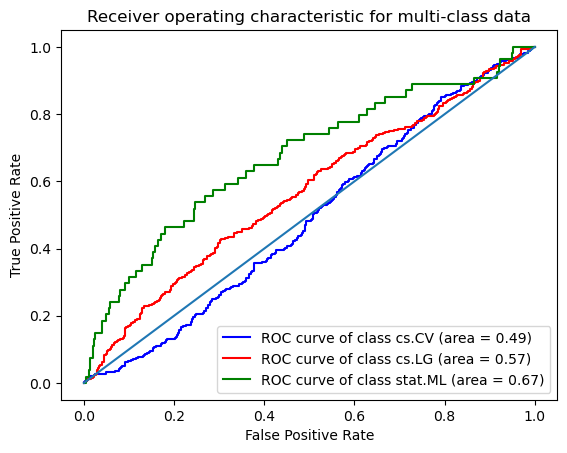

In [ ]:
# https://stackoverflow.com/questions/33547965/computing-auc-and-roc-curve-from-multi-class-data-in-scikit-learn-sklearn

from sklearn.metrics import roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt
from itertools import cycle

classes = naive_bayes_classifier.classes
n_classes = len(classes)


def parse_y_test(y_test):
    global n_classes

    parsed_y_test = np.zeros((len(y_test), n_classes))
    for i in range(len(y_test)):
        my_class = y_test[i]
        my_class_index = class_map_index[my_class]
        parsed_y_test[i][my_class_index] = 1

    return parsed_y_test


fpr = dict()
tpr = dict()
roc_auc = dict()
parsed_y_test = parse_y_test(test_y)
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(parsed_y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

colors = cycle(['blue', 'red', 'green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, label=f'ROC curve of class {classes[i]} (area = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1])
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc='lower right')
plt.show()

In [ ]:
print('''
We know the area under the ROC curve is between 0 and 1, including, and 1 is the best.
So based on the plot and areas, the 'stat.ML' class has the best and the most accurate matches.
''')


We know the area under the ROC curve is between 0 and 1, including, and 1 is the best.
So based on the plot and areas, the 'stat.ML' class has the best and the most accurate matches.



<div dir="rtl">
<font face="XB Zar" size=4>
در این بخش confusion matrix را بدون استفاده از sklearn و به کمک matplotlib و seaborn بکشید.
</font>
</div>

<Axes: >

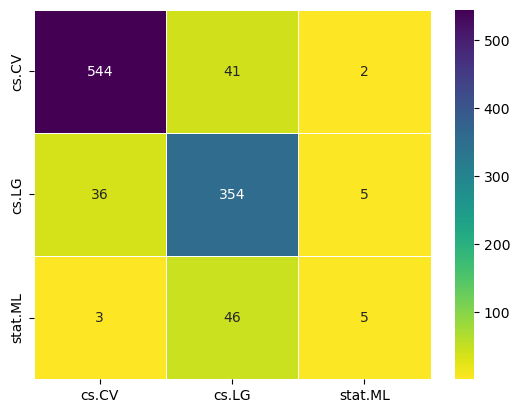

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


#TODO confusion matrix without importing confusion_matrix from sklearn.metrics

def confusion_matrix(y_true, y_pred, labels):
    conf_matrix = np.zeros((len(labels), len(labels)))

    for i in range(len(y_true)):
        conf_matrix[class_map_index[y_true[i]]][class_map_index[y_pred[i]]] += 1

    return conf_matrix


classes = naive_bayes_classifier.classes
conf_matrix = confusion_matrix(test_y, y_pred, classes)
sns.heatmap(conf_matrix,
            annot=True,
            fmt='g',
            xticklabels=classes,
            yticklabels=classes,
            cmap='viridis_r',
            linewidth=.5
            )

<div dir="rtl">
<font face="XB Zar" size=5>
    <h1>
    <b>دسته بندی با شبکه های عصبی (۳۲ نمره)</b>
    </h1>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
     <br>
    شما یک مجموعه داده از مقالات علمی دارید، هرکدام با یک چکیده و موضوع مربوطه نشان داده شده است. هدف ساختن یک مدل شبکه عصبی است که بتواند بر اساس چکیده مقاله علمی و عنوان آن، موضوع آن را پیش بینی کند.
</font>
</div>
   

<div dir="rtl">
<font face="XB Zar" size=5>
    <h2>
    <b>داده ها</b>
    </h2>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
     <br>
    داده‌ای که با آن در این بخش کار می‌کنید چند برچسبی می‌باشند. اما برای این بخش ما تنها برچسب اول از هر مقاله را در نظر می‌گیریم و به صورت تک برچسبی به داده‌ها نگاه می‌کنیم.
</font>
</div>
   

## Requirements

In [ ]:
# colab requirements
is_colab = False

from google.colab import drive
import nltk

is_colab = True

!pip install fasttext
drive.mount('/content/drive')
nltk.download('punkt')
nltk.download('stopwords')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 kB 7.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached pybind11-2.10.4-py3-none-any.whl (222 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp310-cp310-linux_x86_64.whl size=4393173 sha256=b64698653f381cc0174d16abf95ad863e2f6e93449f7d5add3bd0616f4094d56
  Stored in directory: /root/.cache/pip/wheels/a5/13/75/f811c84a8ab36eedbaef977a6a58a98990e8e0f1967f98f394
Successfully built fasttext
Mounted at /content/drive


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# You may not use all of these imports, but they are here to help you get started
# you can add cells if you needed

import nltk
import numpy as np
import pandas as pd
from tqdm import tqdm
from nltk import word_tokenize
import string
from sklearn.model_selection import train_test_split
# import torch
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import fasttext
import os
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader
from time import time
from IPython.display import display

import csv
import ast

## Read and preprocess data


<div dir="rtl">
<font face="XB Zar" size=5>
</font>
<font face="XB Zar" size=3>
     <br>
در ابتدا دیتا را لود کنید. آن را تمیز کنید یا به عبارتی EDA مناسب در حدی که داده‌های null یا موارد این‌چنینی نداشته باشیم، بر روی آن انجام دهید.
 پیش پردازش‌های مورد نیاز که در فاز قبل با آن آشنا شدید را روی داده انجام دهید.
    برای کتگوری هر مقاله برچسب اول آن را از دیتاست در نظر بگیرید.
</font>
</div>

In [ ]:
# read data
if not is_colab:
    df = pd.read_csv('./archive/arxiv_data.csv')
else:
    df = pd.read_csv('./drive/MyDrive/arxiv_data.csv')

In [ ]:
# perform data cleaning and eda (you can add cells here)
df.dropna(inplace=True)

# Because it exceeds the colab memory limitation
df = df.sample(n=30000, random_state=1)
df = df.reset_index(drop=True)

In [ ]:
print(len(df))
df.head()

30000


titles  \
0  Self-Learning to Detect and Segment Cysts in L...   
1  Online trajectory recovery from offline handwr...   
2  SpotPatch: Parameter-Efficient Transfer Learni...   
3  Understanding the role of importance weighting...   
4                  Towards Differentiable Resampling   

                                           summaries  \
0  Image segmentation is a fundamental problem in...   
1  In general, it is straightforward to render an...   
2  Deep learning based object detectors are commo...   
3  The recent paper by Byrd & Lipton (2019), base...   
4  Resampling is a key component of sample-based ...   

                           terms  
0                      ['cs.CV']  
1             ['cs.CV', 'cs.LG']  
2                      ['cs.CV']  
3                      ['cs.LG']  
4  ['cs.LG', 'cs.RO', 'stat.ML']

In [ ]:
def preprocess_text(text, minimum_length=1, stopword_removal=True, stopwords_domain=[], lower_case=True,
                    punctuation_removal=True):
    """
    preprocess text by removing stopwords, punctuations, and converting to lowercase, and also filter based on a min length
    for stopwords use nltk.corpus.stopwords.words('english')
    for punctuations use string.punctuation

    Parameters
    ----------
    text: str
        text to be preprocessed
    minimum_length: int
        minimum length of the token
    stopword_removal: bool
        whether to remove stopwords
    stopwords_domain: list
        list of stopwords to be removed base on domain
    lower_case: bool
        whether to convert to lowercase
    punctuation_removal: bool
        whether to remove punctuations
    """

    normalized_tokens = word_tokenize(text)

    if stopword_removal:
        # Remove stopwords in English and also the given domain stopwords
        nltk_stopwords = nltk.corpus.stopwords.words('english')
        stopwords = [x.lower() for x in nltk_stopwords]

        domain_stopwords = [x.lower() for x in stopwords_domain]

        all_stopwords = domain_stopwords + stopwords
        normalized_tokens = [word for word in normalized_tokens if word.lower() not in all_stopwords]

    if punctuation_removal:
        # Remove punctuations
        normalized_tokens = [word for word in normalized_tokens if word not in string.punctuation]

    if lower_case:
        # Convert everything to lowercase and filter based on a min length
        normalized_tokens = [word.lower() for word in normalized_tokens if len(word) > minimum_length]
    else:
        normalized_tokens = [word for word in normalized_tokens if len(word) > minimum_length]

    return normalized_tokens

In [ ]:
# preprocess text
df['preprocessed_summaries'] = ''
df['preprocessed_titles'] = ''
df['single_terms'] = ''

pbar = tqdm(range(len(df)), desc='preprocessed documents')
for i in pbar:
    df['preprocessed_summaries'][i] = preprocess_text(df['summaries'][i])
    df['preprocessed_titles'][i] = preprocess_text(df['titles'][i])
    df['single_terms'][i] = ast.literal_eval(df['terms'][i])[0]

preprocessed documents: 100%|██████████| 30000/30000 [01:55<00:00, 260.38it/s]


In [ ]:
preprocessed_total = df[['preprocessed_titles', 'preprocessed_summaries', 'single_terms']].copy()
preprocessed_total.rename(
    columns={'preprocessed_titles': 'titles', 'preprocessed_summaries': 'summaries', 'single_terms': 'terms'},
    inplace=True)

In [ ]:
preprocessed_total.head()

titles  \
0  [self-learning, detect, segment, cysts, lung, ...   
1  [online, trajectory, recovery, offline, handwr...   
2  [spotpatch, parameter-efficient, transfer, lea...   
3  [understanding, role, importance, weighting, d...   
4              [towards, differentiable, resampling]   

                                           summaries  terms  
0  [image, segmentation, fundamental, problem, me...  cs.CV  
1  [general, straightforward, render, offline, ha...  cs.CV  
2  [deep, learning, based, object, detectors, com...  cs.CV  
3  [recent, paper, byrd, lipton, 2019, based, emp...  cs.LG  
4  [resampling, key, component, sample-based, rec...  cs.LG

## Vectorize data


<div dir="rtl">
<font face="XB Zar" size=5>
</font>
<font face="XB Zar" size=3>
     <br>
در این قسمت از fasttext کمک می‌گیریم تا به یک embedding اولیه برای هر مقاله برسیم.
    با استفاده از داده‌هایی که داریم یک مدل fasttext آموزش دهید که برای هر توکن یک امبدینگ ۱۰۰تایی بدهد.
    در مرحله‌ی بعد میانگین وزن دار امبدینگ های fasttext
        توکن‌های ورودی (چکیده + عنوان)
    را بر اساس tfidif آن‌ها محاسبه کنید و به امبدینگ نهایی متن برسید.
    <br>
    در واقع به عبارت ساده‌تر بر اساس میانگین وزن‌دار که وزن‌های ما tfidf توکن‌ها می‌باشد به امبدینگ نهایی متن بر اساس fasttext می‌رسیم.
    </font>
</div>

In [ ]:
# https://fasttext.cc/docs/en/python-module.html

class FastText:

    def __init__(self, preprocessor=None, method='skipgram'):
        self.method = method
        self.model = None
        self.preprocessor = preprocessor

    def train(self, texts):
        """
        train the fasttext model and save it into self.model
        Parameters
        ----------
        texts: list of list of str
        """

        self.model = fasttext.train_unsupervised(texts, model=self.method, dim=100, epoch=10, thread=16, minCount=3,
                                                 wordNgrams=2)

    def get_query_embedding(self, query, tf_idf_vectorizer):
        """
        get the embedding of the query. You can use the tf_idf_vectorizer to get the weights of the words in the query. preprocess the query using self.preprocessor if it is not None
        Parameters
        ----------
        query: str
        tf_idf_vectorizer: TfidfVectorizer
        Returns embedding of the query
        """

        query_tokens = query.split(' ') if self.preprocessor is None else self.preprocessor(query)
        query_tokens = set(query_tokens)
        query_tfidf = tf_idf_vectorizer.transform([query]).toarray()[0]

        # "get_text_embedding" defined later
        return get_text_embedding(query_tokens, query_tfidf)

    def save_FastText_model(self, path='FastText_model.bin'):
        self.model.save_model(path)

    def load_FastText_model(self, path="FastText_model.bin"):
        self.model = fasttext.load_model(path)

    def prepare(self, dataset, mode, save=False):
        if mode == 'train':
            self.train(dataset)
        if mode == 'load':
            self.load_FastText_model()
        if save:
            self.save_FastText_model()

In [ ]:
FastText_df = preprocessed_total[['summaries', 'titles', 'terms']].copy()  #.sample(n=30000, random_state=1)
#FastText_df = FastText_df.reset_index(drop=True)
FastText_df.insert(len(FastText_df.columns) - 1, 'aggregated', '')

for i in tqdm(range(len(FastText_df))):
    FastText_df['titles'][i] = ' '.join(FastText_df['titles'][i])
    FastText_df['summaries'][i] = ' '.join(FastText_df['summaries'][i])
    FastText_df['aggregated'][i] = FastText_df['titles'][i] + ' ' + FastText_df['summaries'][i]

FastText_df.head()

100%|██████████| 30000/30000 [00:44<00:00, 679.66it/s]


summaries  \
0  image segmentation fundamental problem medical...   
1  general straightforward render offline handwri...   
2  deep learning based object detectors commonly ...   
3  recent paper byrd lipton 2019 based empirical ...   
4  resampling key component sample-based recursiv...   

                                              titles  \
0  self-learning detect segment cysts lung ct ima...   
1  online trajectory recovery offline handwritten...   
2  spotpatch parameter-efficient transfer learnin...   
3  understanding role importance weighting deep l...   
4                  towards differentiable resampling   

                                          aggregated  terms  
0  self-learning detect segment cysts lung ct ima...  cs.CV  
1  online trajectory recovery offline handwritten...  cs.CV  
2  spotpatch parameter-efficient transfer learnin...  cs.CV  
3  understanding role importance weighting deep l...  cs.LG  
4  towards differentiable resampling resampling k...  cs.LG

In [ ]:
# https://towardsdatascience.com/fasttext-for-text-classification-a4b38cbff27c

fasttext_path = 'fasttext train.txt'
FastText_df['aggregated'].to_csv(fasttext_path, index=False, sep=' ', header=None, quoting=csv.QUOTE_NONE, quotechar='',
                                 escapechar=' ')

In [ ]:
FastText_model = FastText(preprocessor=preprocess_text)
FastText_model.prepare(fasttext_path, mode='train', save=not is_colab)
# FastText_model.prepare(preprocessed_total, mode='load')

In [ ]:
text = 'covid'

FastText_model.model.get_nearest_neighbors(text)

[(0.899377167224884, 'covid-19'),
 (0.8827124238014221, 'covidcare'),
 (0.840690016746521, 'covid19'),
 (0.8112010955810547, 'pandemic'),
 (0.8014594912528992, 'dr-covid'),
 (0.7802575826644897, 'pandemics'),
 (0.7359165549278259, 'endemic'),
 (0.729232907295227, 'covid-related'),
 (0.7204031944274902, 'infects'),
 (0.6933304667472839, 'infected')]

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

class TF_IDF:

    def __init__(self):
        self.vectorizer = TfidfVectorizer(token_pattern=r"(?u)\S+")
        self.X = None

    def fit_vectorizer(self, data):
        """
        fit the vectorizer on the data
        Parameters
        ----------
        data: list of list of str
            (I think it should be the list of str because "fit_transform" does not accept the list of list of str
        """

        self.X = self.vectorizer.fit_transform(data).toarray()

In [ ]:
TF_IDF_model = TF_IDF()
TF_IDF_model.fit_vectorizer(FastText_df['aggregated'])

In [ ]:
fasttext_dim = FastText_model.model.get_dimension()
fasttext_words = FastText_model.model.get_words()
tfidf_vocabulary = TF_IDF_model.vectorizer.vocabulary_


def get_text_embedding(all_tokens, tfidf):
    global fasttext_dim, fasttext_words, tfidf_vocabulary

    embedding = np.zeros(fasttext_dim)
    for token in all_tokens:
        if token in fasttext_words:
            index = FastText_model.model.get_word_id(token)
            fasttext_embedding = FastText_model.model.get_input_vector(index)

            token_tfidf = tfidf[tfidf_vocabulary[token]]
            embedding += token_tfidf * fasttext_embedding

    return embedding

In [ ]:
text = "backpropagation is good"
# TF_IDF_model.vectorizer.transform([' '.join(text)]) # I think it's not correct
TF_IDF_model.vectorizer.transform([text])
query_embedding = FastText_model.get_query_embedding(text, TF_IDF_model.vectorizer)
print(query_embedding.shape)
query_embedding

(100,)


array([-0.49133542, -0.95953728,  0.89899527,  0.26792549,  0.01612973,
        0.02558776, -0.37589498,  0.02732383, -0.61982493,  0.66942307,
       -0.78470705,  1.66682792,  0.21669393, -0.48926192, -0.88966945,
       -0.95545685,  0.75895133,  1.22383633, -0.21016628,  0.18733135,
        0.84017095, -1.38721901,  0.6781482 ,  0.64452641,  0.00599042,
        0.45662791, -1.65402344, -0.43090869, -0.84208578,  0.11985628,
        0.80067858, -0.51355523,  1.93275675, -0.05414799,  0.03819867,
       -1.04168494,  0.5014952 , -0.78738309,  0.36557902, -2.36621067,
        0.26676585, -0.28550484, -0.2772408 ,  1.10144454, -0.65375578,
       -0.95000049,  1.75286174, -0.5206258 , -0.30430664,  0.46573974,
       -0.31615198,  0.74626553, -1.54329601,  1.18218807,  1.35589644,
       -0.17097444,  0.37561694,  0.74307084, -1.8454538 , -0.20587573,
       -0.56119587,  0.88923702,  0.39243883,  0.09804271, -0.48758107,
        0.14406799, -1.01399112,  0.51059511,  0.77873482, -0.78


<div dir="rtl">
<font face="XB Zar" size=5>
</font>
<font face="XB Zar" size=3>
     <br>
حال به کمک مدلی که نوشته‌اید دیتای ورودی شبکه‌ی عصبی را بسازید.
    به عبارتی به ازای هر مقاله embedding مربوطه را بدست آورید.
    همچنین برچسب‌ها را نیز به عدد تبدیل کنید تا برای شبکه‌ی عصبی قابل فهم باشد.
    </font>
</div>

In [ ]:
embeddings = []

for i in tqdm(range(len(FastText_df))):
    all_doc_tokens = preprocessed_total['summaries'][i] + preprocessed_total['titles'][i]
    all_doc_tokens = set(all_doc_tokens)
    doc_tfidf = TF_IDF_model.X[i]

    embedding = get_text_embedding(all_doc_tokens, doc_tfidf)
    embeddings.append(embedding)

embeddings = np.asarray(embeddings)

100%|██████████| 30000/30000 [02:08<00:00, 232.66it/s]


## Prepare data for model


<div dir="rtl">
<font face="XB Zar" size=5>
</font>
<font face="XB Zar" size=3>
     <br>
     در این قسمت dataset ورودی شبکه‌ی عصبی را بسازید.
     همچنین دیتا‌ را به قسمت‌های train test validation تقسیم کنید.
     80% داده برای آموزش
     10% را برای  validation
     و 10% را برای تست در نظر بگیرید.
     در نهایت dataloaderهای مربوطه را بسازید.
    </font>
</div>

In [ ]:
class PapersDataSet(Dataset):
    def __init__(self, embeddings: list, labels: list):
        self.embeddings = embeddings
        self.labels = labels

        if len(self.embeddings) != len(self.labels):
            raise ValueError(
                f'embeddings length ({len(self.embeddings)}) and labels length ({len(self.labels)}) are not equal')

    def __len__(self):
        return len(self.embeddings)

    def __getitem__(self, i):
        return self.embeddings[i], self.labels[i]

In [ ]:
all_labels = set(FastText_df['terms'])
labels_map_number = {}
number_map_labels = {}
for i, label in enumerate(all_labels):
    labels_map_number[label] = i
    number_map_labels[i] = label

labels = FastText_df['terms'].to_numpy()
for i in tqdm(range(len(labels)), desc='labels'):
    labels[i] = labels_map_number[labels[i]]

labels = labels.astype(int)

labels: 100%|██████████| 30000/30000 [00:00<00:00, 1506917.52it/s]


In [ ]:
train_embeddings, test_embeddings, train_labels, test_labels = train_test_split(embeddings, labels, test_size=0.1,
                                                                                random_state=42)
train_embeddings, validation_embeddings, train_labels, validation_labels = train_test_split(train_embeddings,
                                                                                            train_labels,
                                                                                            test_size=1 / 9,
                                                                                            random_state=42)

train_dataset = PapersDataSet(train_embeddings, train_labels)
validation_dataset = PapersDataSet(validation_embeddings, validation_labels)
test_dataset = PapersDataSet(test_embeddings, test_labels)


def get_data_loader(dataset, batch_size=32, shuffle=True, num_workers=0):
    return DataLoader(dataset, batch_size=batch_size, shuffle=shuffle, num_workers=num_workers)


train_loader = get_data_loader(train_dataset)
val_loader = get_data_loader(validation_dataset, shuffle=False)
test_loader = get_data_loader(test_dataset, shuffle=False)

## Build model


<div dir="rtl">
<font face="XB Zar" size=5>
</font>
<font face="XB Zar" size=3>
     <br>
حال دراین قسمت مدل شبکه‌ی عصبی خود را تعریف کنید.
    </font>
</div>

In [ ]:
class ClassifierModel(nn.Module):
    def __init__(self, in_features=FastText_model.model.get_dimension(), num_classes=len(all_labels)):
        super().__init__()
        self.network = nn.Sequential(
            nn.Linear(in_features, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, num_classes),
        )

    def forward(self, x):
        x = x.float()
        return self.network(x)

## Train model



<div dir="rtl">
<font face="XB Zar" size=5>
</font>
<font face="XB Zar" size=3>
     <br>
در این قسمت به کمک داده‌ی آموزش و validation مدل خود را آموزش دهید.
اطلاعات مورد نیاز نظیر lossهای train و validation را ذخیره کنید تا در ادامه به کمک نمودار یادگیری مدل خود را ارزیابی کنید.
    </font>
</div>

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = ClassifierModel().to(device)
device

device(type='cuda')

In [ ]:
criterion = nn.CrossEntropyLoss()
learning_rate = 1e-3
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
def eval_epoch(model: nn.Module, criterion: nn.Module, dataloader: torch.utils.data.DataLoader, test_mode=False):
    """
    Evaluate the model on the given dataloader. used for validation and test
    Parameters
    ----------
    model: nn.Module
    criterion: nn.Module
    dataloader: torch.utils.data.DataLoader
    test_mode: bool
        If True, the function will print 'Test' instead of 'Validation'
    Returns
    -------
    eval_loss: float
        The loss on the given dataloader
    predicted_labels: list
        The predicted labels
    true_labels: list
        The true labels
    f1_score_macro: float
        The f1 score on the given dataloader
    """

    global device

    model.eval()
    eval_loss = 0
    predicted_labels = []
    true_labels = []

    epoch_true = 0
    epoch_all = 0
    with torch.no_grad(), tqdm(enumerate(dataloader), total=len(dataloader)) as pbar:
        for i, (embeddings, labels) in pbar:
            embeddings = embeddings.to(device)
            labels = labels.to(device)
            true_labels += labels

            outputs = model(embeddings)
            loss_result = criterion(outputs, labels)

            eval_loss += loss_result.item() * embeddings.size(0)

            _, predicted = torch.max(outputs.data, 1)
            predicted_labels += predicted

            epoch_all += len(predicted)
            epoch_true += (predicted == labels).sum()
            val_acc = epoch_true / epoch_all

            pbar.set_description(f'Loss: {float(loss_result) / (i + 1):.3e} - Acc: {val_acc * 100.:.2f}%')

    eval_loss /= len(dataloader.dataset)
    f1_score_macro = f1_score(torch.tensor(true_labels), torch.tensor(predicted_labels), average='macro')
    return eval_loss, predicted_labels, true_labels, f1_score_macro

In [ ]:
"""
Train the model for num_epochs epochs
epoch_true and epoch_all are used to calculate the accuracy.
epoch_true is the number of correct predictions and epoch_all is the total number of predictions in the epoch
"""
num_epochs = 50

train_loss_arr, val_loss_arr = [], []
f1_macro_scores = []

for epoch in range(num_epochs):
    start_time = time()

    train_loss, val_loss = 0, 0
    epoch_all = 0
    epoch_true = 0

    model.train()

    with tqdm(enumerate(train_loader), total=len(train_loader)) as pbar:
        for i, (embeddings, labels) in pbar:
            embeddings = embeddings.to(device)
            labels = labels.to(device)

            outputs = model(embeddings)
            loss_result = criterion(outputs, labels)

            loss_result.backward()
            optimizer.step()
            optimizer.zero_grad()
            train_loss += loss_result.item() * embeddings.size(0)

            _, predicted = torch.max(outputs.data, 1)
            epoch_all += len(predicted)
            epoch_true += (predicted == labels).sum()
            train_acc = epoch_true / epoch_all

            pbar.set_description(f'Loss: {float(loss_result) / (i + 1):.3e} - Acc: {train_acc * 100.:.2f}%')

    model.eval()

    val_loss, predicted_labels, true_labels, f1_score_macro = eval_epoch(model, criterion, val_loader)

    train_loss /= len(train_loader.dataset)
    val_loss /= len(val_loader.dataset)
    train_loss_arr.append(train_loss)
    val_loss_arr.append(val_loss)
    f1_macro_scores.append(f1_score_macro)

    end_time = time()

    print(f'Epoch {epoch + 1} finished in {end_time - start_time:.2f}s')

    print(f"[Epoch {epoch + 1}]\t"
          f"Train Loss: {train_loss:.4f}\t"
          f"Validation Loss: {val_loss:.4f}\t F1 score macro: {f1_score_macro}")

Loss: 5.579e-03 - Acc: 82.27%: 100%|██████████| 94/94 [00:00<00:00, 162.19it/s]


Epoch 1 finished in 7.31s
[Epoch 1]	Train Loss: 0.5275	Validation Loss: 0.0002	 F1 score macro: 0.5831519803716101


Loss: 5.919e-03 - Acc: 82.33%: 100%|██████████| 94/94 [00:00<00:00, 268.27it/s]


Epoch 2 finished in 3.94s
[Epoch 2]	Train Loss: 0.4517	Validation Loss: 0.0002	 F1 score macro: 0.626262179185601


Loss: 4.902e-03 - Acc: 82.80%: 100%|██████████| 94/94 [00:00<00:00, 321.59it/s]


Epoch 3 finished in 3.80s
[Epoch 3]	Train Loss: 0.4055	Validation Loss: 0.0002	 F1 score macro: 0.621156191292355


Loss: 6.115e-03 - Acc: 82.87%: 100%|██████████| 94/94 [00:00<00:00, 303.23it/s]


Epoch 4 finished in 3.89s
[Epoch 4]	Train Loss: 0.3676	Validation Loss: 0.0002	 F1 score macro: 0.6450393029605208


Loss: 6.782e-03 - Acc: 82.80%: 100%|██████████| 94/94 [00:00<00:00, 313.50it/s]


Epoch 5 finished in 3.82s
[Epoch 5]	Train Loss: 0.3225	Validation Loss: 0.0002	 F1 score macro: 0.6381792273117181


Loss: 7.578e-03 - Acc: 83.37%: 100%|██████████| 94/94 [00:00<00:00, 327.89it/s]


Epoch 6 finished in 3.71s
[Epoch 6]	Train Loss: 0.2831	Validation Loss: 0.0002	 F1 score macro: 0.6538261976235239


Loss: 6.652e-03 - Acc: 82.47%: 100%|██████████| 94/94 [00:00<00:00, 255.37it/s]


Epoch 7 finished in 3.85s
[Epoch 7]	Train Loss: 0.2391	Validation Loss: 0.0002	 F1 score macro: 0.6674992559219856


Loss: 7.020e-03 - Acc: 82.73%: 100%|██████████| 94/94 [00:00<00:00, 278.27it/s]


Epoch 8 finished in 4.15s
[Epoch 8]	Train Loss: 0.2060	Validation Loss: 0.0002	 F1 score macro: 0.6581627298893935


Loss: 7.689e-03 - Acc: 81.97%: 100%|██████████| 94/94 [00:00<00:00, 282.59it/s]


Epoch 9 finished in 3.80s
[Epoch 9]	Train Loss: 0.1670	Validation Loss: 0.0002	 F1 score macro: 0.6768716108427464


Loss: 1.070e-02 - Acc: 83.27%: 100%|██████████| 94/94 [00:00<00:00, 282.85it/s]


Epoch 10 finished in 3.91s
[Epoch 10]	Train Loss: 0.1365	Validation Loss: 0.0002	 F1 score macro: 0.667353943349633


Loss: 8.819e-03 - Acc: 82.83%: 100%|██████████| 94/94 [00:00<00:00, 240.65it/s]


Epoch 11 finished in 4.11s
[Epoch 11]	Train Loss: 0.1109	Validation Loss: 0.0003	 F1 score macro: 0.6700446770573967


Loss: 1.070e-02 - Acc: 82.37%: 100%|██████████| 94/94 [00:00<00:00, 262.59it/s]


Epoch 12 finished in 4.12s
[Epoch 12]	Train Loss: 0.0908	Validation Loss: 0.0003	 F1 score macro: 0.6602710764480034


Loss: 1.354e-02 - Acc: 82.70%: 100%|██████████| 94/94 [00:00<00:00, 282.40it/s]


Epoch 13 finished in 3.89s
[Epoch 13]	Train Loss: 0.0760	Validation Loss: 0.0003	 F1 score macro: 0.6688218390804598


Loss: 1.372e-02 - Acc: 82.90%: 100%|██████████| 94/94 [00:00<00:00, 282.73it/s]


Epoch 14 finished in 3.83s
[Epoch 14]	Train Loss: 0.0604	Validation Loss: 0.0003	 F1 score macro: 0.6582568679336048


Loss: 1.454e-02 - Acc: 83.17%: 100%|██████████| 94/94 [00:00<00:00, 313.70it/s]


Epoch 15 finished in 3.81s
[Epoch 15]	Train Loss: 0.0651	Validation Loss: 0.0003	 F1 score macro: 0.6664570329372328


Loss: 1.054e-02 - Acc: 82.93%: 100%|██████████| 94/94 [00:00<00:00, 124.47it/s]


Epoch 16 finished in 4.42s
[Epoch 16]	Train Loss: 0.0606	Validation Loss: 0.0003	 F1 score macro: 0.6625353368256593


Loss: 1.675e-02 - Acc: 84.00%: 100%|██████████| 94/94 [00:00<00:00, 257.73it/s]


Epoch 17 finished in 4.20s
[Epoch 17]	Train Loss: 0.0451	Validation Loss: 0.0004	 F1 score macro: 0.6662958542017892


Loss: 1.665e-02 - Acc: 82.87%: 100%|██████████| 94/94 [00:00<00:00, 306.97it/s]


Epoch 18 finished in 3.82s
[Epoch 18]	Train Loss: 0.0401	Validation Loss: 0.0004	 F1 score macro: 0.6716993006680377


Loss: 1.308e-02 - Acc: 83.00%: 100%|██████████| 94/94 [00:00<00:00, 279.72it/s]


Epoch 19 finished in 3.93s
[Epoch 19]	Train Loss: 0.0501	Validation Loss: 0.0004	 F1 score macro: 0.6677122768866228


Loss: 1.245e-02 - Acc: 82.57%: 100%|██████████| 94/94 [00:00<00:00, 272.18it/s]


Epoch 20 finished in 3.87s
[Epoch 20]	Train Loss: 0.0387	Validation Loss: 0.0004	 F1 score macro: 0.6611823133371407


Loss: 1.655e-02 - Acc: 83.10%: 100%|██████████| 94/94 [00:00<00:00, 275.90it/s]


Epoch 21 finished in 3.69s
[Epoch 21]	Train Loss: 0.0432	Validation Loss: 0.0004	 F1 score macro: 0.6710114799129502


Loss: 1.531e-02 - Acc: 82.43%: 100%|██████████| 94/94 [00:00<00:00, 300.25it/s]


Epoch 22 finished in 3.80s
[Epoch 22]	Train Loss: 0.0306	Validation Loss: 0.0005	 F1 score macro: 0.6572457424097508


Loss: 1.489e-02 - Acc: 82.00%: 100%|██████████| 94/94 [00:00<00:00, 271.96it/s]


Epoch 23 finished in 3.70s
[Epoch 23]	Train Loss: 0.0440	Validation Loss: 0.0005	 F1 score macro: 0.6520198615017209


Loss: 1.672e-02 - Acc: 83.40%: 100%|██████████| 94/94 [00:00<00:00, 301.35it/s]


Epoch 24 finished in 3.84s
[Epoch 24]	Train Loss: 0.0291	Validation Loss: 0.0005	 F1 score macro: 0.6622810335427433


Loss: 1.604e-02 - Acc: 83.07%: 100%|██████████| 94/94 [00:00<00:00, 278.83it/s]


Epoch 25 finished in 4.04s
[Epoch 25]	Train Loss: 0.0344	Validation Loss: 0.0005	 F1 score macro: 0.6708529032413034


Loss: 1.809e-02 - Acc: 82.73%: 100%|██████████| 94/94 [00:00<00:00, 289.81it/s]


Epoch 26 finished in 3.90s
[Epoch 26]	Train Loss: 0.0231	Validation Loss: 0.0005	 F1 score macro: 0.6716130031159184


Loss: 1.324e-02 - Acc: 83.70%: 100%|██████████| 94/94 [00:00<00:00, 318.73it/s]


Epoch 27 finished in 3.86s
[Epoch 27]	Train Loss: 0.0310	Validation Loss: 0.0005	 F1 score macro: 0.6828512123154633


Loss: 1.588e-02 - Acc: 82.67%: 100%|██████████| 94/94 [00:00<00:00, 305.67it/s]


Epoch 28 finished in 3.91s
[Epoch 28]	Train Loss: 0.0347	Validation Loss: 0.0005	 F1 score macro: 0.665047106984613


Loss: 2.197e-02 - Acc: 82.63%: 100%|██████████| 94/94 [00:00<00:00, 321.59it/s]


Epoch 29 finished in 3.78s
[Epoch 29]	Train Loss: 0.0333	Validation Loss: 0.0005	 F1 score macro: 0.6658666478690392


Loss: 1.562e-02 - Acc: 83.60%: 100%|██████████| 94/94 [00:00<00:00, 315.59it/s]


Epoch 30 finished in 3.90s
[Epoch 30]	Train Loss: 0.0258	Validation Loss: 0.0005	 F1 score macro: 0.6796148909637418


Loss: 1.436e-02 - Acc: 82.97%: 100%|██████████| 94/94 [00:00<00:00, 271.56it/s]


Epoch 31 finished in 4.09s
[Epoch 31]	Train Loss: 0.0315	Validation Loss: 0.0005	 F1 score macro: 0.6675024264840902


Loss: 1.881e-02 - Acc: 83.17%: 100%|██████████| 94/94 [00:00<00:00, 154.53it/s]


Epoch 32 finished in 4.07s
[Epoch 32]	Train Loss: 0.0192	Validation Loss: 0.0005	 F1 score macro: 0.6776456389232773


Loss: 1.149e-02 - Acc: 82.47%: 100%|██████████| 94/94 [00:00<00:00, 271.27it/s]


Epoch 33 finished in 3.86s
[Epoch 33]	Train Loss: 0.0288	Validation Loss: 0.0005	 F1 score macro: 0.6615658101165347


Loss: 1.771e-02 - Acc: 82.07%: 100%|██████████| 94/94 [00:00<00:00, 296.91it/s]


Epoch 34 finished in 3.99s
[Epoch 34]	Train Loss: 0.0307	Validation Loss: 0.0005	 F1 score macro: 0.6591748495954345


Loss: 1.875e-02 - Acc: 83.67%: 100%|██████████| 94/94 [00:00<00:00, 305.88it/s]


Epoch 35 finished in 4.18s
[Epoch 35]	Train Loss: 0.0223	Validation Loss: 0.0005	 F1 score macro: 0.6908229484175377


Loss: 1.871e-02 - Acc: 84.03%: 100%|██████████| 94/94 [00:00<00:00, 301.62it/s]


Epoch 36 finished in 3.77s
[Epoch 36]	Train Loss: 0.0219	Validation Loss: 0.0006	 F1 score macro: 0.6713666035208882


Loss: 2.250e-02 - Acc: 82.33%: 100%|██████████| 94/94 [00:00<00:00, 276.56it/s]


Epoch 37 finished in 3.78s
[Epoch 37]	Train Loss: 0.0331	Validation Loss: 0.0006	 F1 score macro: 0.6711028128283884


Loss: 2.047e-02 - Acc: 83.10%: 100%|██████████| 94/94 [00:00<00:00, 313.97it/s]


Epoch 38 finished in 3.72s
[Epoch 38]	Train Loss: 0.0183	Validation Loss: 0.0006	 F1 score macro: 0.6706176522970416


Loss: 1.676e-02 - Acc: 83.87%: 100%|██████████| 94/94 [00:00<00:00, 274.14it/s]


Epoch 39 finished in 3.93s
[Epoch 39]	Train Loss: 0.0141	Validation Loss: 0.0006	 F1 score macro: 0.6684624383130678


Loss: 1.819e-02 - Acc: 82.63%: 100%|██████████| 94/94 [00:00<00:00, 285.84it/s]


Epoch 40 finished in 3.98s
[Epoch 40]	Train Loss: 0.0339	Validation Loss: 0.0006	 F1 score macro: 0.6575113763897144


Loss: 2.595e-02 - Acc: 83.37%: 100%|██████████| 94/94 [00:00<00:00, 311.24it/s]


Epoch 41 finished in 3.87s
[Epoch 41]	Train Loss: 0.0307	Validation Loss: 0.0006	 F1 score macro: 0.6778719870532038


Loss: 2.024e-02 - Acc: 82.77%: 100%|██████████| 94/94 [00:00<00:00, 259.95it/s]


Epoch 42 finished in 3.98s
[Epoch 42]	Train Loss: 0.0105	Validation Loss: 0.0006	 F1 score macro: 0.6802481877906533


Loss: 1.438e-02 - Acc: 82.33%: 100%|██████████| 94/94 [00:00<00:00, 287.99it/s]


Epoch 43 finished in 4.04s
[Epoch 43]	Train Loss: 0.0232	Validation Loss: 0.0006	 F1 score macro: 0.6747260889655712


Loss: 1.596e-02 - Acc: 83.30%: 100%|██████████| 94/94 [00:00<00:00, 288.27it/s]


Epoch 44 finished in 4.05s
[Epoch 44]	Train Loss: 0.0255	Validation Loss: 0.0006	 F1 score macro: 0.6644862490450726


Loss: 1.759e-02 - Acc: 83.13%: 100%|██████████| 94/94 [00:00<00:00, 268.79it/s]


Epoch 45 finished in 3.93s
[Epoch 45]	Train Loss: 0.0192	Validation Loss: 0.0006	 F1 score macro: 0.6734741592715451


Loss: 1.763e-02 - Acc: 83.87%: 100%|██████████| 94/94 [00:00<00:00, 311.64it/s]


Epoch 46 finished in 3.76s
[Epoch 46]	Train Loss: 0.0193	Validation Loss: 0.0006	 F1 score macro: 0.6862764656718356


Loss: 2.242e-02 - Acc: 83.47%: 100%|██████████| 94/94 [00:00<00:00, 323.11it/s]


Epoch 47 finished in 3.86s
[Epoch 47]	Train Loss: 0.0240	Validation Loss: 0.0006	 F1 score macro: 0.6621022448247387


Loss: 2.307e-02 - Acc: 82.83%: 100%|██████████| 94/94 [00:00<00:00, 118.66it/s]


Epoch 48 finished in 4.17s
[Epoch 48]	Train Loss: 0.0160	Validation Loss: 0.0006	 F1 score macro: 0.6663702668040759


Loss: 1.798e-02 - Acc: 82.80%: 100%|██████████| 94/94 [00:00<00:00, 274.46it/s]


Epoch 49 finished in 4.11s
[Epoch 49]	Train Loss: 0.0242	Validation Loss: 0.0007	 F1 score macro: 0.6477261156227946


Loss: 1.450e-02 - Acc: 83.57%: 100%|██████████| 94/94 [00:00<00:00, 304.86it/s]


Epoch 50 finished in 3.87s
[Epoch 50]	Train Loss: 0.0168	Validation Loss: 0.0006	 F1 score macro: 0.6688457947970256


<div dir="rtl">
<font face="XB Zar" size=5>
</font>
<font face="XB Zar" size=3>
     <br>
نمودار loss بر حسب epoch را برای داده‌های train و validation رسم کنید.
    </font>
</div>

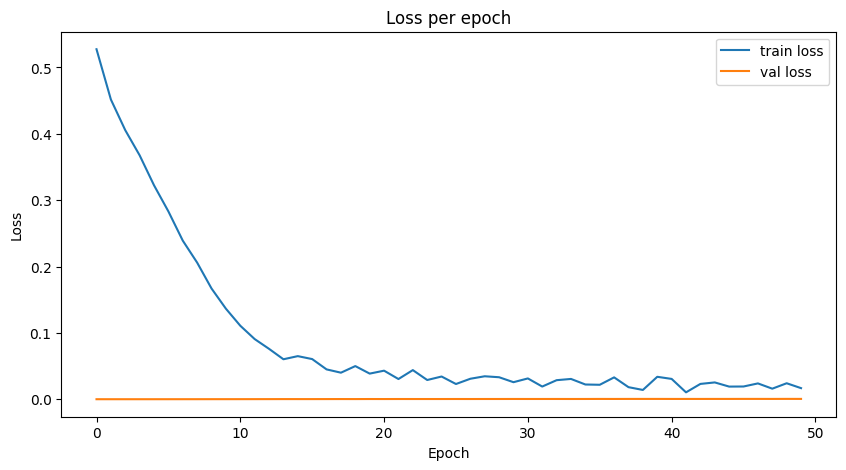

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(train_loss_arr, label='train loss')
plt.plot(val_loss_arr, label='val loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss per epoch')

plt.show()

<div dir="rtl">
<font face="XB Zar" size=5>
</font>
<font face="XB Zar" size=3>
     <br>
نمودار f1 score بر حسب epoch را برای داده‌های train و validation رسم کنید.
    </font>
</div>

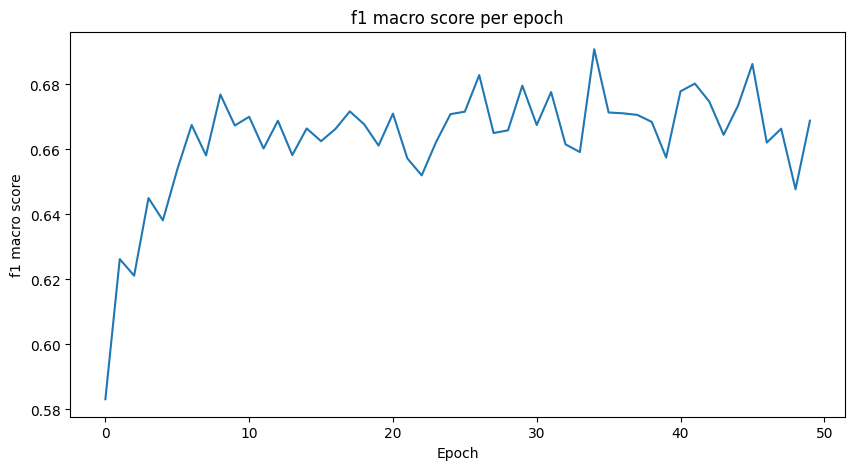

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(f1_macro_scores, label='f1 macro score')
plt.xlabel('Epoch')
plt.ylabel('f1 macro score')
plt.title('f1 macro score per epoch')

plt.show()

## Evaluate model

<div dir="rtl">
<font face="XB Zar" size=5>
</font>
<font face="XB Zar" size=3>
     <br>
حال داده‌ی test را به مدلتان دهید و بر اساس خروجی‌ها موارد زیر را به دست آورید.
    <br>
    <br>
    <ul>
        <li>accuracy</li>
        <li>Loss</li>
        <li>F1-Macro</li>
        <li>F1-Micro</li>
        <li>Confusion matrix</li>
        <li>Macro-average precision</li>
        <li>Macro-average recall</li>
        <li>Micro-average precision</li>
        <li>Micro-average recall</li>
    </ul>
    </font>
</div>

In [ ]:
# print the required metrics
model.eval()
eval_loss, predicted_labels, true_labels, f1_score_macro = eval_epoch(model, criterion, test_loader, test_mode=True)
eval_loss = torch.tensor(eval_loss)
predicted_labels = torch.tensor(predicted_labels)
true_labels = torch.tensor(true_labels)
f1_score_macro = torch.tensor(f1_score_macro)

accuracy = accuracy_score(true_labels, predicted_labels)
loss = eval_loss / len(test_loader.dataset)
f1_score_micro = f1_score(true_labels, predicted_labels, average='micro')
my_confusion_matrix = confusion_matrix(true_labels, predicted_labels)
precision_macro = precision_score(true_labels, predicted_labels, average='macro')
recall_macro = recall_score(true_labels, predicted_labels, average='macro')
precision_micro = precision_score(true_labels, predicted_labels, average='micro')
recall_micro = recall_score(true_labels, predicted_labels, average='micro')

print(f"Accuracy: {accuracy}")
print(f"Loss: {loss}")
print(f"F1-Macro: {f1_score_macro}")
print(f"F1-Micro: {f1_score_micro}")
print(f"Confusion matrix: {my_confusion_matrix}")
print(f"Macro-average precision: {precision_macro}")
print(f"Macro-average recall: {recall_macro}")
print(f"Micro-average precision: {precision_micro}")
print(f"Micro-average recall: {recall_micro}")

Loss: 6.841e-03 - Acc: 84.00%: 100%|██████████| 94/94 [00:00<00:00, 293.92it/s]


Accuracy: 0.84
Loss: 0.0006077649886719882
F1-Macro: 0.7053449253552783
F1-Micro: 0.8399999999999999
Confusion matrix: [[  58   26   94]
 [  10 1446  149]
 [  43  158 1016]]
Macro-average precision: 0.7388762537614729
Macro-average recall: 0.6872056819981712
Micro-average precision: 0.84
Micro-average recall: 0.84


<div dir="rtl">
<font face="XB Zar" size=3>
     <br>
در نهایت در این قسمت تابعی بنویسید که یک متن را به عنوان ورودی بگیرد و بر اساس مدلتان برچسب‌ مناسب را به آن بدهد.
    <br>
    <br>
    </font>
</div>
    

In [ ]:
def predict(x):
    """
    predict the class code of a given query
    :param x: the query
    :return: the class of the query in the form of real strings.
    """
    global FastText_model, TF_IDF_model, model, number_map_labels, device

    query_embedding = FastText_model.get_query_embedding(x, TF_IDF_model.vectorizer)
    model.eval()
    with torch.no_grad():
        query_embedding = torch.tensor(query_embedding, dtype=torch.float32)
        query_embedding = query_embedding.to(device)
        query_embedding = query_embedding.unsqueeze(0)
        output = model(query_embedding)
        predicted_class = torch.argmax(output).item()

    predicted_class = number_map_labels[predicted_class]
    return predicted_class

In [ ]:
predict('hardware and computerc architecture is good')

'cs.LG'

In [ ]:
PATH = "nn_fasttext_model.pt"

# Save
torch.save(model, PATH)

<div dir="rtl">
<font face="XB Zar" size=5>
    <h1>
    <b>دسته بندی با استفاده از مدل های زبانی (۴۰ نمره)</b>
    </h1>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
     <br>
در این قسمت قرار است تا به کمک language modelهای از پیش آموزش شده 
و fine-tune کردن آن‌ها طبقه‌بند خودمان را درست کنیم.
</font>
</div>
   

## Requirements

In [2]:
# colab requirements
is_colab = False

from google.colab import drive
import nltk
is_colab = True

!pip install transformers==4.28.0
drive.mount('/content/drive')
nltk.download('punkt')
nltk.download('stopwords')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
import torch
import nltk
import numpy as np
import pandas as pd
from tqdm import tqdm
from nltk import word_tokenize
import string
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer, BertForSequenceClassification, TrainingArguments, Trainer
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score

import ast
import random
from transformers import (AutoConfig,
                          AutoModelForSequenceClassification,
                          AutoTokenizer,
                          get_linear_schedule_with_warmup,
                          set_seed,
                          TrainingArguments,
                          Trainer,
                          )
import os
from custom_dataset import CustomDataset

## Read and preprocess data


<div dir="rtl">
<font face="XB Zar" size=5>
</font>
<font face="XB Zar" size=3>
     <br>
در ابتدا دیتا را لود کنید. آن را تمیز کنید یا به عبارتی EDA مناسب در حدی که داده‌های null یا موارد این‌چنینی نداشته باشیم، بر روی آن انجام دهید.
 پیش پردازش‌های مورد نیاز که در فاز قبل با آن آشنا شدید را روی داده انجام دهید.
    برای کتگوری هر مقاله برچسب اول آن را از دیتاست در نظر بگیرید.
</font>
</div>

In [4]:
# read data
if not is_colab:
    df = pd.read_csv('./archive/arxiv_data.csv')
else:
    df = pd.read_csv('./drive/MyDrive/arxiv_data.csv')

In [5]:
# perform data cleaning and eda (you can add cells here)
df.dropna(inplace=True)

In [6]:
random_state = 1

df = df.sample(n=10000, random_state=random_state)
df = df.reset_index(drop=True)

In [7]:
def preprocess_text(text, minimum_length=1, stopword_removal=True, stopwords_domain=[], lower_case=True,
                    punctuation_removal=True):
    """
    preprocess text by removing stopwords, punctuations, and converting to lowercase, and also filter based on a min length
    for stopwords use nltk.corpus.stopwords.words('english')
    for punctuations use string.punctuation

    Parameters
    ----------
    text: str
        text to be preprocessed
    minimum_length: int
        minimum length of the token
    stopword_removal: bool
        whether to remove stopwords
    stopwords_domain: list
        list of stopwords to be removed base on domain
    lower_case: bool
        whether to convert to lowercase
    punctuation_removal: bool
        whether to remove punctuations
    """

    normalized_tokens = word_tokenize(text)

    if stopword_removal:
        # Remove stopwords in English and also the given domain stopwords
        nltk_stopwords = nltk.corpus.stopwords.words('english')
        stopwords = [x.lower() for x in nltk_stopwords]

        domain_stopwords = [x.lower() for x in stopwords_domain]

        all_stopwords = domain_stopwords + stopwords
        normalized_tokens = [word for word in normalized_tokens if word.lower() not in all_stopwords]

    if punctuation_removal:
        # Remove punctuations
        normalized_tokens = [word for word in normalized_tokens if word not in string.punctuation]

    if lower_case:
        # Convert everything to lowercase and filter based on a min length
        normalized_tokens = [word.lower() for word in normalized_tokens if len(word) > minimum_length]
    else:
        normalized_tokens = [word for word in normalized_tokens if len(word) > minimum_length]

    return normalized_tokens

In [8]:
# preprocess text
df['preprocessed_summaries'] = ''
df['preprocessed_titles'] = ''
df['single_terms'] = ''

pbar = tqdm(range(len(df)), desc='preprocessed documents')
for i in pbar:
    df['preprocessed_summaries'][i] = preprocess_text(df['summaries'][i])
    df['preprocessed_titles'][i] = preprocess_text(df['titles'][i])
    df['single_terms'][i] = ast.literal_eval(df['terms'][i])[0]

preprocessed documents: 100%|██████████| 10000/10000 [00:59<00:00, 168.85it/s]


In [9]:
preprocessed_total = df[['preprocessed_titles', 'preprocessed_summaries', 'single_terms']].copy()
preprocessed_total.rename(
    columns={'preprocessed_titles': 'titles', 'preprocessed_summaries': 'summaries', 'single_terms': 'terms'},
    inplace=True)

In [10]:
preprocessed_total.head()

titles  \
0  [self-learning, detect, segment, cysts, lung, ...   
1  [online, trajectory, recovery, offline, handwr...   
2  [spotpatch, parameter-efficient, transfer, lea...   
3  [understanding, role, importance, weighting, d...   
4              [towards, differentiable, resampling]   

                                           summaries  terms  
0  [image, segmentation, fundamental, problem, me...  cs.CV  
1  [general, straightforward, render, offline, ha...  cs.CV  
2  [deep, learning, based, object, detectors, com...  cs.CV  
3  [recent, paper, byrd, lipton, 2019, based, emp...  cs.LG  
4  [resampling, key, component, sample-based, rec...  cs.LG

## Prepare data for model


<div dir="rtl">
<font face="XB Zar" size=5>
</font>
<font face="XB Zar" size=3>
     <br>
     در این قسمت برچسب‌ها و متن‌ها را برای مدل آماده کنید.
     برای متن هم عنوان و هم چکیده را در نظر بگیرید و این دو را به هم بچسبانید.
     به صورت رندم، ۱۰۰۰۰ داده را برای تمرین انتخاب کنید.
     همچنین جدا‌سازی داده‌ها را انجام دهید.
     در این بخش کافی است تا داده‌ها را به دو دسته‌ی آموزش و تست تقسیم کنید. 80% داده‌ها برای آموزش و 20% را برای تست قرار دهید.
    </font>
</div>

In [11]:
# calculate labels
# calculate final texts
# select 10000 data randomly
# split data into train and test

transformer_df = preprocessed_total[['summaries', 'titles', 'terms']].copy()
transformer_df.insert(len(transformer_df.columns) - 1, 'aggregated', '')

for i in tqdm(range(len(transformer_df))):
    transformer_df['titles'][i] = ' '.join(transformer_df['titles'][i])
    transformer_df['summaries'][i] = ' '.join(transformer_df['summaries'][i])
    transformer_df['aggregated'][i] = transformer_df['titles'][i] + ' ' + transformer_df['summaries'][i]

100%|██████████| 10000/10000 [00:13<00:00, 765.50it/s]


In [12]:
all_labels = set(transformer_df['terms'])
labels_map_number = {}
number_map_labels = {}
for i, label in enumerate(all_labels):
    labels_map_number[label] = i
    number_map_labels[i] = label

labels = transformer_df['terms'].to_numpy().copy()
for i in tqdm(range(len(labels)), desc='labels'):
    labels[i] = labels_map_number[labels[i]]

labels: 100%|██████████| 10000/10000 [00:00<00:00, 1641799.04it/s]


In [13]:
transformer_df.head()

summaries  \
0  image segmentation fundamental problem medical...   
1  general straightforward render offline handwri...   
2  deep learning based object detectors commonly ...   
3  recent paper byrd lipton 2019 based empirical ...   
4  resampling key component sample-based recursiv...   

                                              titles  \
0  self-learning detect segment cysts lung ct ima...   
1  online trajectory recovery offline handwritten...   
2  spotpatch parameter-efficient transfer learnin...   
3  understanding role importance weighting deep l...   
4                  towards differentiable resampling   

                                          aggregated  terms  
0  self-learning detect segment cysts lung ct ima...  cs.CV  
1  online trajectory recovery offline handwritten...  cs.CV  
2  spotpatch parameter-efficient transfer learnin...  cs.CV  
3  understanding role importance weighting deep l...  cs.LG  
4  towards differentiable resampling resampling k...  cs.LG

In [14]:
X_train, X_test, y_train, y_test = train_test_split(transformer_df['aggregated'].tolist(), labels.tolist(),
                                                    test_size=0.2, random_state=random_state)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=random_state)

## Transformer based classification


<div dir="rtl">
<font face="XB Zar" size=5>
</font>
<font face="XB Zar" size=3>
     <br>
مدلی که در این قسمت استفاده می‌کنیم مدل معروف bert می‌باشد.
    برای این کار از کتابخانه transformers استفاده می‌کنیم.
    مدل و tokenizer مربوطه را لود کنید.
    <br><b><u>
    به کمک داده‌های قسمت قبل و به کمک 
    Trainer
    مربوط به کتاب‌خانه‌ی transformers عملیات fine-tune را انجام دهید.
    <br>
    همچنین یکبار وزن‌های مدل برت را فریز کنید و فقط دسته‌بند مربوطه را آموزش دهید.
    </u></b><br>
    مطالعه‌ی بیشتر کتاب‌خانه‌ی transformers بسیار توصیه می‌شود.
    </font>
</div>

In [15]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [18]:
MODEL_NAME = "bert-base-uncased"
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
unique_labels = transformer_df['terms'].unique().tolist()
n_labels = len(unique_labels)

model_1 = AutoModelForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=n_labels).to(device)
model_2 = AutoModelForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=n_labels).to(device)
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [19]:
train_encodings = tokenizer(X_train, add_special_tokens=True, truncation=True, padding=True, return_tensors='pt').to(
    device)
val_encodings = tokenizer(X_val, add_special_tokens=True, truncation=True, padding=True, return_tensors='pt').to(device)
test_encodings = tokenizer(X_test, add_special_tokens=True, truncation=True, padding=True, return_tensors='pt').to(
    device)

In [20]:
# AttributeError: Can't get attribute 'CustomDataset' on <module '__main__' (built-in)>

# class CustomDataset(torch.utils.data.Dataset):
#     def __init__(self, encodings, labels):
#         self.encodings = encodings
#         self.labels = labels
#
#     def __getitem__(self, idx):
#         item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
#         item['labels'] = torch.tensor(self.labels[idx])
#         return item
#
#     def __len__(self):
#         return len(self.labels)


train_dataset = CustomDataset(train_encodings, y_train)
val_dataset = CustomDataset(val_encodings, y_val)
test_dataset = CustomDataset(test_encodings, y_test)

In [21]:
# fine tune bert and train model
training_args_1 = TrainingArguments(
    output_dir='./results1',  # output directory
    num_train_epochs=3,  # total number of training epochs
    per_device_train_batch_size=16,  # batch size per device during training
    per_device_eval_batch_size=64,  # batch size for evaluation
    warmup_steps=500,  # number of warmup steps for learning rate scheduler
    weight_decay=0.01,  # strength of weight decay
    logging_steps=10,
    evaluation_strategy='steps',
    eval_steps=500,
    save_steps=500,
    save_total_limit=1,
    load_best_model_at_end=True,
    metric_for_best_model='eval_loss',
    greater_is_better=False,
    gradient_accumulation_steps=2,
    dataloader_num_workers=0,
    run_name='run_name',
    seed=1,
    dataloader_pin_memory=False
)

optimizers_1 = (torch.optim.AdamW(model_1.parameters(), lr=5e-5), get_linear_schedule_with_warmup(
    torch.optim.AdamW(model_1.parameters(), lr=5e-5), num_warmup_steps=500, num_training_steps=5000))

trainer_1 = Trainer(
    model=model_1,  # the instantiated 🤗 Transformers model to be trained
    args=training_args_1,  # training arguments, defined above
    train_dataset=train_dataset,  # training dataset
    eval_dataset=val_dataset,  # evaluation dataset
    optimizers=optimizers_1  # define optimizers and learning rate scheduler
)

trainer_1.train()

/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:139: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "


TrainOutput(global_step=600, training_loss=0.36726571242014566, metrics={'train_runtime': 1524.1112, 'train_samples_per_second': 12.598, 'train_steps_per_second': 0.394, 'total_flos': 4440038924160000.0, 'train_loss': 0.36726571242014566, 'epoch': 3.0})

In [22]:
# freeze bert weights and then train model_2
for param in model_2.bert.parameters():
    param.requires_grad = False

training_args_2 = TrainingArguments(
    output_dir='./results2',  # output directory
    num_train_epochs=3,  # total number of training epochs
    per_device_train_batch_size=16,  # batch size per device during training
    per_device_eval_batch_size=64,  # batch size for evaluation
    warmup_steps=500,  # number of warmup steps for learning rate scheduler
    weight_decay=0.01,  # strength of weight decay
    logging_steps=10,
    evaluation_strategy='steps',
    eval_steps=500,
    save_steps=500,
    save_total_limit=1,
    load_best_model_at_end=True,
    metric_for_best_model='eval_loss',
    greater_is_better=False,
    gradient_accumulation_steps=2,
    dataloader_num_workers=0,
    run_name='run_name',
    seed=1,
    dataloader_pin_memory=False
)

optimizers_2 = (torch.optim.AdamW(model_2.parameters(), lr=5e-5), get_linear_schedule_with_warmup(
    torch.optim.AdamW(model_2.parameters(), lr=5e-5), num_warmup_steps=500, num_training_steps=5000))

trainer_2 = Trainer(
    model=model_2,  # the instantiated 🤗 Transformers model to be trained
    args=training_args_2,  # training arguments, defined above
    train_dataset=train_dataset,  # training dataset
    eval_dataset=val_dataset,  # evaluation dataset
    optimizers=optimizers_2  # define optimizers and learning rate scheduler
)

trainer_2.train()

/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:139: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "


TrainOutput(global_step=600, training_loss=0.8504778560002645, metrics={'train_runtime': 614.7493, 'train_samples_per_second': 31.232, 'train_steps_per_second': 0.976, 'total_flos': 4440038924160000.0, 'train_loss': 0.8504778560002645, 'epoch': 3.0})

## Evaluate model

<div dir="rtl">
<font face="XB Zar" size=3>
     <br>
حال داده‌ی test را به هر دو مدل بدهید و بر اساس خروجی‌ها موارد زیر را به دست آورید.
    <br>
    <br>
    <ul>
        <li>accuracy</li>
        <li>F1-Macro</li>
        <li>F1-Micro</li>
        <li>Confusion matrix</li>
        <li>Macro-average precision</li>
        <li>Macro-average recall</li>
        <li>Micro-average precision</li>
        <li>Micro-average recall</li>
    </ul>
    </font>
</div>

In [23]:
y_pred_transformers_1 = []
y_pred_transformers_2 = []

pred_1 = trainer_1.predict(test_dataset)[0]
pred_2 = trainer_2.predict(test_dataset)[0]

In [24]:
y_pred_transformers_1 = np.argmax(pred_1, axis=1).tolist()
y_pred_transformers_2 = b = np.argmax(pred_2, axis=1).tolist()

In [25]:
print('Metrics for model 1:')

accuracy = accuracy_score(y_test, y_pred_transformers_1)
f1_score_macro = f1_score(y_test, y_pred_transformers_1, average='macro')
f1_score_micro = f1_score(y_test, y_pred_transformers_1, average='micro')
my_confusion_matrix = confusion_matrix(y_test, y_pred_transformers_1)
precision_macro = precision_score(y_test, y_pred_transformers_1, average='macro')
recall_macro = recall_score(y_test, y_pred_transformers_1, average='macro')
precision_micro = precision_score(y_test, y_pred_transformers_1, average='micro')
recall_micro = recall_score(y_test, y_pred_transformers_1, average='micro')

print(f"Accuracy: {accuracy}")
print(f"F1-Macro: {f1_score_macro}")
print(f"F1-Micro: {f1_score_micro}")
print(f"Confusion matrix: {my_confusion_matrix}")
print(f"Macro-average precision: {precision_macro}")
print(f"Macro-average recall: {recall_macro}")
print(f"Micro-average precision: {precision_micro}")
print(f"Micro-average recall: {recall_micro}")

Metrics for model 1:
Accuracy: 0.8595
F1-Macro: 0.58594653228422
F1-Micro: 0.8595
Confusion matrix: [[ 681  137    0]
 [  25 1038    0]
 [ 106   13    0]]
Macro-average precision: 0.5708024414920967
Macro-average recall: 0.6029999976999174
Micro-average precision: 0.8595
Micro-average recall: 0.8595


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [26]:
print('Metrics for model 2:')

accuracy = accuracy_score(y_test, y_pred_transformers_2)
f1_score_macro = f1_score(y_test, y_pred_transformers_2, average='macro')
f1_score_micro = f1_score(y_test, y_pred_transformers_2, average='micro')
my_confusion_matrix = confusion_matrix(y_test, y_pred_transformers_2)
precision_macro = precision_score(y_test, y_pred_transformers_2, average='macro')
recall_macro = recall_score(y_test, y_pred_transformers_2, average='macro')
precision_micro = precision_score(y_test, y_pred_transformers_2, average='micro')
recall_micro = recall_score(y_test, y_pred_transformers_2, average='micro')

print(f"Accuracy: {accuracy}")
print(f"F1-Macro: {f1_score_macro}")
print(f"F1-Micro: {f1_score_micro}")
print(f"Confusion matrix: {my_confusion_matrix}")
print(f"Macro-average precision: {precision_macro}")
print(f"Macro-average recall: {recall_macro}")
print(f"Micro-average precision: {precision_micro}")
print(f"Micro-average recall: {recall_micro}")

Metrics for model 2:
Accuracy: 0.6025
F1-Macro: 0.3581057911416117
F1-Micro: 0.6025
Confusion matrix: [[ 188  630    0]
 [  46 1017    0]
 [  28   91    0]]
Macro-average precision: 0.43423753429551093
Macro-average recall: 0.395518365775998
Micro-average precision: 0.6025
Micro-average recall: 0.6025


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<div dir="rtl">
<font face="XB Zar" size=3>
     <br>
     نتایج به دست آمده برای دو مدل آموزش داده شده را مقایسه کنید و سپس نتایج مدل بهتر را با خروجی‌های fasttext که در قسمت قبل استخراج کردید نیز مقایسه کنید و تحلیل‌های خود را بنویسید.
    <br>
    <br>
    </font>
</div>

<div dir="rtl">
<font face="XB Zar" size=3>
پاسخ خود را در این قسمت بنویسید

همان‌طور که انتظار می‌رفت، چون model_2 دوباره آموزش ندیده است، پس در معیارها بدتر عمل کرده است.

در ادامه با مقایسه با مدل fsttext می‌توانیم ببینیم که مدل model_2 به همان دلیل گفته شده بدتر است ولی درباره‌ی model_1 می‌توان دید که در معیارهای Micro این مدل بهتر و در معیارهای Macro این مدل بدتر کار کرده است. یعنی به طور کلّی به ازای هر کلاس جدا، بدتر ولی در کل بهتر بوده است. همچنین Accuracy این مدل نسبت به fasttext چون مدل بهتری و از پیش آموزش داده شده‌ای است، بهتر است.
</font>
</div>

<div dir="rtl">
<font face="XB Zar" size=3>
     <br>
در نهایت در این قسمت تابعی بنویسید که یک متن را به عنوان ورودی بگیرد و بر اساس مدلتان برچسب‌ مناسب را به آن بدهد.
    <br>
    <br>
    </font>
</div>
    

In [29]:
def predict(x, trainer):
    """
    predict the class code of a given query
    :param x: the query
    :return: the class of the query in the form of real strings.
    """
    global tokenizer, CustomDataset, number_map_labels
    
    encodings = tokenizer([x], add_special_tokens=True, truncation=True,
                          padding=True, return_tensors='pt').to(device)
    dataset = CustomDataset(encodings, [0])
    predicted_class = trainer.predict(dataset)[0]
    return number_map_labels[np.argmax(predicted_class, axis=1).tolist()[0]]

In [33]:
predict('hardware is very good.', trainer_1)

'cs.CV'

In [34]:
# It is highly recommended to save your final models
trainer_1.save_model('hugging_face_model_1_bert-base-uncased')
trainer_2.save_model('hugging_face_model_2_bert-base-uncased_freezed')

<div dir="rtl">
<font face="XB Zar" size=5>
    <h2>
    <b>جستجو و بازیابی اسناد در دسته‌های مختلف</b>
    </h2>
</font>
<font face="XB Zar" size=4>
در این بخش می‌خواهیم به تابع search مربوط به فاز قبل قابلیتی اضافه کنیم که بر اساس آن بتوان جستجو و بازیابی پرسمان را به یک دسته خاص محدود کرد و یا مشخص کرد که جستجو بر روی تمام اسناد انجام شود. همانند فاز قبل:
<br>
 پرسمانی که از کاربر می‌گیرید را در مجموعه اسناد نمایه شده جست و جو کنید. توجه داشته باشید که جست و جویی که انجام می‌دهید هم باید در عنوان مقاله و هم در چکیده آن انجام شود. در نهایت، اسناد باید به ترتیب امتیاز نهایی‌شان برگردانده شوند. امتیاز نهایی هر سند نیز از جمع وزن‌دار امتیاز جستجو در عنوان و جستجو در چکیده مقاله به دست می‌آید.
<br>
ورودی‌های تابع search در این فاز، همانند فاز قبل است؛ تنها ورودی category به آن اضافه شده است. در صورتی که ورودی category برابر all باشد، جستجو در تمامی اسناد انجام می‌شود. در صورتی که category برابر نام یک دسته باشد، جستجو تنها در دسته گفته شده انجام می‌شود.
<br>
(برای این قسمت از کدهایی که در فاز قبل زده‌اید استفاده کنید و قابلیت گفته شده را به آن اضافه کنید.)
</font>
</div>

In [35]:
# colab requirements
is_colab = False

from google.colab import drive
import nltk
is_colab = True

!pip install import_ipynb
drive.mount('/content/drive')
nltk.download('wordnet')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [37]:
import import_ipynb
import ir_phase_1
import importlib

importlib.reload(ir_phase_1)

importing Jupyter notebook from ir_phase_1.ipynb
Start
Start preprocessing ...
Indexing ...


Completed documents: 100%|██████████| 6183/6183 [00:19<00:00, 309.27it/s]


Start viewing ...
Start dynamic indexing ...
Empty DataFrame
Columns: [paperId, title, abstract, Unnamed: 3, Unnamed: 4]
Index: []

Start compressing index ...
Start query correction ...


Strings with created bigram index: 100%|██████████| 35993/35993 [00:00<00:00, 41095.64it/s]


Start searching ...


Documents with calculated length in title field: 100%|██████████| 6183/6183 [00:06<00:00, 938.74it/s]
Documents with calculated length in abstract field: 100%|██████████| 6183/6183 [00:05<00:00, 1105.94it/s]

Start evaluating...
End


<module 'ir_phase_1' from 'ir_phase_1.ipynb'>

In [38]:
from ir_phase_1 import get_document_by_id, search as ir_phase_1_search

In [74]:
def new_search_2(title_query: str, abstract_query: str, max_result_count: int, method: str = 'ltn-lnn',
           weight: float = 0.5, should_print=False, category='all'):
    """
        Finds relevant documents to query
        
        Parameters
        ---------------------------------------------------------------------------------------------------
        max_result_count: Return top 'max_result_count' docs which have the highest scores. 
                          notice that if max_result_count = -1, then you have to return all docs
        
        mode: 'detailed' for searching in title and text separately.
              'overall' for all words, and weighted by where the word apears on.
        
        method: 'ltn-lnn' or 'ltc-lnc' or 'okapi25'

        category: 'all' for searching in all documents. 
                  'category_name' for searching in a specific category with category_name label.

        Returns
        ----------------------------------------------------------------------------------------------------
        list
        Retreived documents with snippet
    """
    global trainer_1

    if category == 'all':
        return ir_phase_1_search(title_query=title_query, abstract_query=abstract_query, max_result_count=max_result_count,
                             method=method, weight=weight, should_print=should_print)
    else:
        if category not in unique_labels:
            raise ValueError(f'category should be one of the following: {unique_labels}')
        else:
            search_results = ir_phase_1_search(title_query=title_query, abstract_query=abstract_query,
                                               max_result_count=-1, method=method, weight=weight,
                                               should_print=should_print)

            output_ids = []
            for document_id in search_results:
                if len(output_ids) >= max_result_count:
                    break

                document = get_document_by_id(document_id, False)
                document_text = str(document['title']) + ' ' + str(document['abstract'])
                
                document_category = predict(document_text, trainer_1)
                if document_category == category:
                    output_ids.append(document_id)


            return output_ids

In [75]:
new_search_2(title_query='machine learning', abstract_query='deep', max_result_count=10, weight=0.3,
             method='okapi25', category='cs.CV')

Checked documents: 100%|██████████| 1139/1139 [00:06<00:00, 162.92it/s]


['864e033c002c5ec48d4c273c53ce995682fc3e21',
 '1ba07035f83792154e77ed35d842e04de8a1eeeb',
 'b3ea79473e7438ae3d551f79a84207f8bd0e830d',
 'bbf052271c70dd926cd230bb5640cdcdfeccf1cc',
 '96baf66b1ead911d18b64ad674c9512e189c290b',
 '463565c30b7a9c12c2ef0558a51cfc7b05055737',
 '80d9f0eb47b712988d19cbe29a7bfa63f2a175d0',
 'f29df408f1407c60b0f85dd595a883de7c66e763',
 '9a3855ac64358d95386cac5120929c88197e26dc',
 '2c88c3d8bc68858e4c9ba58ec3d71454e94eb96e']

<div dir="rtl">
<font face="XB Zar" size=6>
    <h1>
    <b>خوشه‌بندی (۴۰ نمره)</b>
    </h1>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
در این قسمت شما به خوشه‌بندی اسناد و استفاده از آن خوشه‌ها برای اهداف مختلف میپردازید. برای این منظور، ابتدا برای هر سند، بردار جاسازی (Embedding) تولید کرده و با استفاده از دو الگوریتم kmeans و خوشه‌بندی سلسله‌مراتبی (Hierarchical Clustering)، خوشه‌ها را ایجاد می‌کنید.
</font>
</div>

In [3]:
# colab requirements
is_colab = False

from google.colab import drive
import nltk
is_colab = True

!pip install sentence_transformers
drive.mount('/content/drive')
nltk.download('punkt')
nltk.download('stopwords')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
import torch
import nltk
import numpy as np
import pandas as pd
from tqdm.auto import tqdm
from nltk import word_tokenize
import string
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.manifold import TSNE

import ast
from sentence_transformers import SentenceTransformer
import plotly.express as px
import matplotlib.pyplot as plt

In [12]:
if not is_colab:
    df = pd.read_csv('./archive/arxiv_data.csv')
else:
    df = pd.read_csv('./drive/MyDrive/arxiv_data.csv')

df.dropna(inplace=True)

In [13]:
def preprocess_text(text, minimum_length=1, stopword_removal=True, stopwords_domain=[], lower_case=True,
                    punctuation_removal=True):
    """
    preprocess text by removing stopwords, punctuations, and converting to lowercase, and also filter based on a min length
    for stopwords use nltk.corpus.stopwords.words('english')
    for punctuations use string.punctuation

    Parameters
    ----------
    text: str
        text to be preprocessed
    minimum_length: int
        minimum length of the token
    stopword_removal: bool
        whether to remove stopwords
    stopwords_domain: list
        list of stopwords to be removed base on domain
    lower_case: bool
        whether to convert to lowercase
    punctuation_removal: bool
        whether to remove punctuations
    """

    normalized_tokens = word_tokenize(text)

    if stopword_removal:
        # Remove stopwords in English and also the given domain stopwords
        nltk_stopwords = nltk.corpus.stopwords.words('english')
        stopwords = [x.lower() for x in nltk_stopwords]

        domain_stopwords = [x.lower() for x in stopwords_domain]

        all_stopwords = domain_stopwords + stopwords
        normalized_tokens = [word for word in normalized_tokens if word.lower() not in all_stopwords]

    if punctuation_removal:
        # Remove punctuations
        normalized_tokens = [word for word in normalized_tokens if word not in string.punctuation]

    if lower_case:
        # Convert everything to lowercase and filter based on a min length
        normalized_tokens = [word.lower() for word in normalized_tokens if len(word) > minimum_length]
    else:
        normalized_tokens = [word for word in normalized_tokens if len(word) > minimum_length]

    return normalized_tokens

In [14]:
df['preprocessed_summaries'] = ''
df['preprocessed_titles'] = ''
df['single_terms'] = ''

pbar = tqdm(range(len(df)), desc='preprocessed documents')
for i in pbar:
    df['preprocessed_summaries'][i] = preprocess_text(df['summaries'][i])
    df['preprocessed_titles'][i] = preprocess_text(df['titles'][i])
    df['single_terms'][i] = ast.literal_eval(df['terms'][i])[0]

preprocessed documents:   0%|          | 0/51774 [00:00<?, ?it/s]

In [15]:
preprocessed_total = df[['preprocessed_titles', 'preprocessed_summaries', 'single_terms']].copy()
preprocessed_total.rename(
    columns={'preprocessed_titles': 'titles', 'preprocessed_summaries': 'summaries', 'single_terms': 'terms'},
    inplace=True)

In [19]:
cluster_df = preprocessed_total[['summaries', 'titles', 'terms']].copy()
cluster_df.insert(len(cluster_df.columns) - 1, 'aggregated', '')

for i in tqdm(range(len(cluster_df))):
    cluster_df['titles'][i] = ' '.join(cluster_df['titles'][i])
    cluster_df['summaries'][i] = ' '.join(cluster_df['summaries'][i])
    cluster_df['aggregated'][i] = cluster_df['titles'][i] + ' ' + cluster_df['summaries'][i]

  0%|          | 0/51774 [00:00<?, ?it/s]

In [20]:
all_labels = set(cluster_df['terms'])
labels_map_number = {}
number_map_labels = {}
for i, label in enumerate(all_labels):
    labels_map_number[label] = i
    number_map_labels[i] = label

labels = cluster_df['terms'].to_numpy().copy()
for i in tqdm(range(len(labels)), desc='labels'):
    labels[i] = labels_map_number[labels[i]]

labels:   0%|          | 0/51774 [00:00<?, ?it/s]

In [21]:
cluster_df.head()

summaries  \
0  stereo matching one widely used techniques inf...   
1  recent advancements artificial intelligence ai...   
2  paper proposed novel mutual consistency networ...   
3  consistency training proven advanced semi-supe...   
4  ensure safety automated driving correct percep...   

                                              titles  \
0  survey semantic stereo matching semantic depth...   
1  future-ai guiding principles consensus recomme...   
2  enforcing mutual consistency hard regions semi...   
3  parameter decoupling strategy semi-supervised ...   
4  background-foreground segmentation interior se...   

                                          aggregated  terms  
0  survey semantic stereo matching semantic depth...  cs.CV  
1  future-ai guiding principles consensus recomme...  cs.CV  
2  enforcing mutual consistency hard regions semi...  cs.CV  
3  parameter decoupling strategy semi-supervised ...  cs.CV  
4  background-foreground segmentation interior se...  cs.CV

<div dir="rtl">
<font face="XB Zar" size=5>
    <h2>
    <b>استخراج بردار جاسازی اسناد</b>
    </h2>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
اگرچه امکان ایجاد بردار جاسازی برای هر سند با استفاده از روش ‌Bag of Words نیز وجود دارد، اما برای اینکه احتمالا بتوانید به نتابج بهتری در خوشه‌بندی برسید، در این قسمت از مدل‌های زبانی برمبنای مبدل‌ها (Transformers) برای استخراج این بردارها استفاده می‌کنید.
برای این منظور می‌توانید از
<a href="https://huggingface.co/">HuggingFace</a>
  و مدل‌های متعددی که در آن وجود دارد استفاده کنید.
  <br>
  در تابع extract_embedding پیاده‌سازی مورد نیاز را انجام دهید. این تابع لیستی از اسناد را به عنوان ورودی دریافت میکند و در خروجی لیستی از بردار‌های جاسازی متناظر با هر عنصر در ورودی را برمی‌گرداند.
  <br>
برای محاسبه بردار جاسازی هر سند، روش های مختلفی وجود دارد. استفاده از بردار جاسازی توکن CLS در مدل ‌BERT، میانگین‌گیری (وزن‌دار یا بدون وزن) از بردارهای جاسازی هر کلمه ورودی و ... از روش‌های موجود هستند که می‌توانید به دلخواه خود انتخاب کنید.
</font>
</div>

In [24]:
# https://www.sbert.net/docs/pretrained_models.html
# https://huggingface.co/sentence-transformers/all-mpnet-base-v2
## ؟ points

from typing import List

is_run_fast = True

if is_run_fast:
    embedding_model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')
else:
    embedding_model = SentenceTransformer('sentence-transformers/all-mpnet-base-v2')


def extract_embedding(doc_list: List):
    """Extracts embedding vector for each document in doc_list

    Parameters
    ----------
    doc_list : List
        A list of documents

    Returns
    -------
    list
        A list of embedding vectors
    """
    global embedding_model

    return embedding_model.encode(doc_list)

# docs_embedding = extract_embedding(
#     [str, str, str, ...])  # return [[NUM, NUM, NUM, ...], [NUM, NUM, NUM, ...], [NUM, NUM, NUM, ...]]

In [25]:
docs_embedding = extract_embedding(cluster_df['aggregated'])
docs_labels = labels.copy()
print(docs_embedding.shape)
docs_embedding

(51774, 384)


array([[-0.06250358, -0.04725583,  0.01869556, ...,  0.03966423,
        -0.01455882, -0.05500047],
       [-0.00270099, -0.03025589, -0.02091572, ...,  0.01453036,
         0.00793064,  0.00532527],
       [ 0.01856163, -0.09092631,  0.05688295, ...,  0.02684394,
        -0.12188832, -0.03164072],
       ...,
       [-0.00383561, -0.0763672 , -0.03830965, ..., -0.04744532,
        -0.01912615,  0.00126345],
       [ 0.0031629 , -0.04959682,  0.02135923, ..., -0.02027617,
        -0.02818538, -0.07519288],
       [ 0.03344144, -0.02304113, -0.05132932, ..., -0.02557082,
        -0.07455845, -0.03824045]], dtype=float32)

In [26]:
np.save('cluster_docs_embeddings.npy', docs_embedding)
np.save('cluster_docs_labels.npy', docs_labels)

In [5]:
docs_embedding = np.load('cluster_docs_embeddings.npy')
docs_labels = np.load('cluster_docs_labels.npy', allow_pickle=True)

<div dir="rtl">
<font face="XB Zar" size=5>
    <h2>
    <b>کاهش بعد بردارها برای رسم نمودار دوبعدی</b>
    </h2>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
برای اینکه بتوانید در مراحل بعدی، نتایج خوشه‌بندی را مشاهده کنید، در این قسمت به پیاده‌سازی تابع کاهش بعد بردارهای جاسازی با استفاده از روش T-SNE می‌پردازید.
برای اینکار تابع convert_to_2d_tsne را پیاده‌سازی می‌کنید که لیستی از بردارهای جاسازی را به عنوان ورودی دریافت می‌کند و در خروجی، لیستی از بردارهای جاسازی کاهش بعد داده شده به دو بعد را تولید می‌کند. برای پیاده سازی این تابع می‌توانید از کتابخانه‌های آماده استفاده کنید.
<br>
توجه کنید که از بردارهای خروجی این قسمت <u>صرفا برای رسم نمودار</u> استفاده می‌کنید و تمامی مراحلی که در ادامه طی می‌کنید (به جز رسم نمودار)، باید با استفاده از بردارهای کاهش بعد داده <u>نشده</u> انجام شوند.
</font>
</div>

In [28]:
## ؟ points

from typing import List


def convert_to_2d_tsne(emb_vecs: List):
    """Converts each raw embedding vector to 2d vector 

    Parameters
    ----------
    emb_vecs : List
        A list of vectors

    Returns
    -------
    list
        A list of 2d vectors
    """

    tsne = TSNE(n_components=2)
    return tsne.fit_transform(emb_vecs)

# docs_embedding_2d = convert_to_2d_tsne([[NUM, NUM, NUM, ...], [NUM, NUM, NUM, ...],
#                                         [NUM, NUM, NUM, ...]])  # return [[NUM, NUM], [NUM, NUM], [NUM, NUM], ...]

In [29]:
tsne_embeddings = convert_to_2d_tsne(docs_embedding)
print(tsne_embeddings.shape)
tsne_embeddings

(51774, 2)


array([[-62.525284 ,   4.9729624],
       [-10.523638 , -80.74152  ],
       [-38.938934 , -73.14024  ],
       ...,
       [ 28.98201  , -80.41187  ],
       [-61.003555 , -80.58208  ],
       [ 31.500051 , -41.07033  ]], dtype=float32)

<div dir="rtl">
<font face="XB Zar" size=5>
    <h2>
    <b>رسم نمودار</b>
    </h2>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
در این قسمت، تابع plot_docs را پیاده‌سازی می‌کنید که لیستی از بردارهای کاهش بعد داده شده و لیستی از شماره‌ خوشه‌‌های هربردار (برای رنگ‌آمیزی نقاط) را به عنوان ورودی دریافت کرده و نمودار دوبعدی ای را رسم می‌کند که در آن به هر خوشه یک رنگ مجزا اختصاص داده شده است و هر سند به عنوان یک نقطه نشان داده می‌شود که به رنگ خوشه‌ای است که به آن نسبت داده شده است. 
</font>
</div>



In [30]:
## ؟ points

from typing import List


def plot_docs(emb_vecs_2d: List, labels: List):
    """Draws a 2d plot of input vectors

    Parameters
    ----------
    emb_2d_vecs : List
        A list of 2d vectors

    Returns
    -------
    """

    labels = np.sort(np.asarray(labels)).astype(str)
    fig = px.scatter(x=emb_vecs_2d[:, 0], y=emb_vecs_2d[:, 1], color=labels, title='2D plot of documents')
    fig.show()

# plot_docs([[NUM, NUM], [NUM, NUM], [NUM, NUM], ...])

In [31]:
docs_name_labels = np.vectorize(lambda x: number_map_labels[x])(docs_labels)
plot_docs(tsne_embeddings, docs_name_labels)

<div dir="rtl">
<font face="XB Zar" size=5>
    <h2>
    <b>خوشه‌بندی مستندها</b>
    </h2>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
در این قسمت شما به خوشه‌بندی اسناد با استفاده از بردارهای جاسازی مستخرج از مدل زبانی با دو روش Kmeans و خوشه‌بندی سلسله‌مراتبی می‌پردازید.
</font>
</div>

<div dir="rtl">
<font face="XB Zar" size=4>
    <h3>
    <b>روش K-means</b>
    </h3>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
در این قسمت، شما ابتدا الگوریتم خوشه‌بندی K-means را 
<u><b>از پایه</b></u>
 پیاده‌سازی کرده و سپس با استفاده از آن، خوشه‌های اسناد را ایجاد می‌کنید. الگوریتم را با استفاده از چند مقدار مختلف تعداد خوشه‌ها (k) اجرا کنید. در هربار اجرا، با استفاده از تعدادی از اسناد موجود در هر خوشه، موضوع آن خوشه را تعیین کرده و خوشه‌بندی حاصله را با استفاده از بردار‌های دوبعدی قسمت قبل، رسم کنید. با اینکار، پیاده‌سازی خود و همچنین کارایی این الگوریتم در خوشه‌بندی اسناد و قرار دادن اسناد مشابه در خوشه‌های یکسان را بررسی کنید.
<br>
 نمودار silhouette score برای مقدار‌های محتلف k را رسم کرده و silhouette analysis برای انتخاب k مناسب انجام دهید. 
 همچنین با استفاده از داده‌های دارای برچسب، مقدار purity به ازای k را رسم کرده و مقدار purity برای k نهایی را گزارش کنید.
<br>
پیاده‌سازی خود را در تابع cluster_kmeans قرار دهید. این تابع یک لیست از بردارهای جاسازی دریافت کرده و در خروجی، مختصات مرکز هر خوشه را به همراه لیستی از شماره خوشه‌های متناظر با هر بردار جاسازی تولید می‌کند.
توجه کنید که الگوریتم می‌بایست از پایه پیاده‌سازی شود و امکان استفاده از پیاده‌سازی‌های آماده آن وجود ندارد.
</font>
</div>

In [32]:
## ؟ points

from typing import List


def get_initial_centers(emb_vecs, n_clusters):
    min_of_each_dim = np.zeros(emb_vecs.shape[1])
    max_of_each_dim = np.zeros(emb_vecs.shape[1])
    for i in range(emb_vecs.shape[1]):
        min_of_each_dim[i] = np.min(emb_vecs[:, i])
        max_of_each_dim[i] = np.max(emb_vecs[:, i])

    centers = np.zeros((n_clusters, emb_vecs.shape[1]))
    for i in range(n_clusters):
        centers[i] = np.random.uniform(min_of_each_dim, max_of_each_dim)

    return centers


def get_cluster_label(emb_vec, centers):
    distances = np.linalg.norm(emb_vec - centers, axis=1)
    cluster_label = np.argmin(distances)

    return cluster_label

def get_word_count(concat_titles):
    word_count = {}
    title_words = concat_titles.split()
    for word in title_words:
        if word in word_count:
            word_count[word] += 1
        else:
            word_count[word] = 1

    return word_count

def get_cluster_titles(emb_vecs, centers):
    global cluster_df
    cluster_titles = []

    for center in centers:
        distances = np.linalg.norm(emb_vecs - center, axis=1)
        documents_index = np.argsort(distances)[:3]
        documents = cluster_df.iloc[documents_index]
        titles = documents['titles'].values
        concat_titles = ' '.join(titles)

        word_count = get_word_count(concat_titles)
        sorted_word_count = sorted(word_count.items(), key=lambda x: x[1], reverse=True)
        chosen_words = sorted_word_count[:5]

        title = ''
        for word in chosen_words:
            title += word[0] + ' '
        cluster_titles.append(title[:-1])

    return cluster_titles

def cluster_kmeans(emb_vecs: List, n_clusters: int):
    """Clusters input vectors using K-means method

    Parameters
    ----------
    emb_vecs : List
        A list of vectors

    Returns
    -------
    list
        Two lists: 1) A list containing cluster centers 2) A list containing cluster index for each input vector
    """

    emb_vecs = np.asarray(emb_vecs).copy()
    centers = get_initial_centers(emb_vecs, n_clusters)
    cluster_labels = []
    is_converge = False

    pbar = tqdm(desc=f'K-means: {n_clusters}')
    iterations = 0
    while not is_converge:
        cluster_labels = []
        for emb_vec in emb_vecs:
            cluster_labels.append(get_cluster_label(emb_vec, centers))
        cluster_labels = np.asarray(cluster_labels)

        new_centers = np.zeros((n_clusters, emb_vecs.shape[1]))
        for i in range(n_clusters):
            cluster_points = emb_vecs[cluster_labels == i]
            if len(cluster_points) > 0:
                new_centers[i] = np.mean(cluster_points, axis=0)
            else:
                new_centers[i] = centers[i]

        if np.allclose(centers, new_centers) or iterations > 100:
            is_converge = True
        else:
            centers = new_centers

        iterations += 1
        pbar.update(1)


    cluster_titles = get_cluster_titles(emb_vecs, centers)
    return centers, cluster_labels, cluster_titles

# cluster_centers, cluster_kmeans = cluster_kmeans(
#     [[NUM, NUM, NUM, ...], [NUM, NUM, NUM, ...], [NUM, NUM, NUM, ...]])  # return [NUM, NUM, NUM, ...]

In [33]:
def run_kmeans(embeddings, n_classes_range=range(2, 11), print_title=True):
    cluster_specifications = []

    for n_classes in n_classes_range:
        cluster_centers, cluster_labels, cluster_titles = cluster_kmeans(embeddings, n_classes)
        if print_title:
            print(f'Title: {cluster_titles}')
        cluster_specifications.append((n_classes, cluster_centers, cluster_labels))

    return cluster_specifications

In [38]:
n_classes_range = range(2, 11)
cluster_specifications = run_kmeans(docs_embedding)

K-means: 2: 0it [00:00, ?it/s]

Title: ['foreground inference network video surveillance', 'learning representation understanding dynamics nonlinear']


K-means: 3: 0it [00:00, ?it/s]

Title: ['learning exploration reward never give', 'foreground inference network video surveillance', 'learning representation analysis use autoencoders']


K-means: 4: 0it [00:00, ?it/s]

Title: ['foreground inference network video surveillance', 'learning exploration reward never give', 'comparative study unsupervised network representation', 'learning representation analysis use autoencoders']


K-means: 5: 0it [00:00, ?it/s]

Title: ['foreground inference network video surveillance', 'monocular 3d detection geometric constraints', 'learning exploration reward never give', 'image synthesis adversarial networks comprehensive', 'comparative study unsupervised network representation']


K-means: 6: 0it [00:00, ?it/s]

Title: ['learning representation analysis use autoencoders', 'image synthesis adversarial networks comprehensive', 'learning exploration reward never give', 'foreground inference network video surveillance', 'monocular 3d detection geometric constraints', 'comparative study unsupervised network representation']


K-means: 7: 0it [00:00, ?it/s]

Title: ['vr3dense voxel representation learning 3d', 'comparative study unsupervised network representation', 'image synthesis adversarial networks comprehensive', 'learning exploration reward never give', 'best practices convolutional neural networks', 'learning representation analysis use autoencoders', 'visual learning transferable models natural']


K-means: 8: 0it [00:00, ?it/s]

Title: ['video networks recognition foreground inference', 'image synthesis adversarial networks comprehensive', 'comparative study unsupervised network representation', 'vr3dense voxel representation learning 3d', 'learning exploration reward never give', 'deep learning unified region edge', 'learning representation analysis use autoencoders', 'iterative answer prediction pointer-augmented multimodal']


K-means: 9: 0it [00:00, ?it/s]

Title: ['co-embedding nodes edges graph neural', 'learning exploration reward never give', 'deep learning unified region edge', 'learning understanding dynamics nonlinear representation', 'iterative answer prediction pointer-augmented multimodal', 'foreground inference network video surveillance', 'learning interpretable classification using machine', 'image synthesis adversarial networks comprehensive', 'vr3dense voxel representation learning 3d']


K-means: 10: 0it [00:00, ?it/s]

Title: ['learning understanding dynamics nonlinear representation', 'efficient decomposition framework discriminative segmentation', 'learning reinforcement generalizing skills semi-supervised', 'reinforcement learning policy minimum-delay adaptation', 'vr3dense voxel representation learning 3d', 'image synthesis adversarial networks comprehensive', 'learning interpretable classification using machine', 'attention dual pyramid feature maps', 'co-embedding nodes edges graph neural', 'best practices convolutional neural networks']


In [35]:
print('''
Based on titles, we can see k-means works well. For example, in k-means with 3 classes, it seems the first cluster is about machine learning, reward and exploration, maybe reinforcement learning, the second is about neural networks and inference, and the third is about machine learning and autoencoders. When we increase k, we see topics get more specific because each embedding is going to be a cluster!
''')


Based on titles, we can see k-means works well. For example, in k-means with 3 classes, it seems the first cluster is about machine learning, reward and exploration, maybe reinforcement learning, the second is about neural networks and inference, and the third is about machine learning and autoencoders. When we increase k, we see topics get more specific because each embedding is going to be a cluster!



In [39]:
from sklearn.metrics import silhouette_score

def run_silhouette_score(embeddings, specifications):
    shilhouette_scores = []
    best_shilhouette_score = -2
    best_shilhouette_specification = None

    pbar = tqdm(specifications)
    for n_classes, cluster_centers, cluster_labels in pbar:
        shilhouette_score = silhouette_score(embeddings, cluster_labels)
        shilhouette_scores.append(shilhouette_score)

        if shilhouette_score > best_shilhouette_score:
            best_shilhouette_score = shilhouette_score
            best_shilhouette_specification = (n_classes, cluster_centers, cluster_labels)

    return shilhouette_scores, best_shilhouette_score, best_shilhouette_specification

In [40]:
shilhouette_result = run_silhouette_score(docs_embedding, cluster_specifications)

  0%|          | 0/9 [00:00<?, ?it/s]

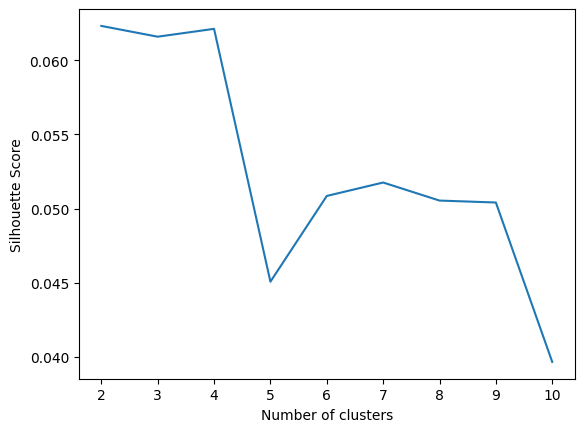

In [41]:
plt.plot(n_classes_range, shilhouette_result[0])
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [42]:
plot_docs(tsne_embeddings, shilhouette_result[2][2])

In [43]:
def purity_score_calc(y_true, y_pred):
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix)


purity_scores = []
best_purity_score = -1
best_purity_specification = None

pbar = tqdm(cluster_specifications)
for n_classes, cluster_centers, cluster_labels in pbar:
    purity_score = purity_score_calc(docs_labels, cluster_labels)
    purity_scores.append(purity_score)

    if purity_score > best_purity_score:
        best_purity_score = purity_score
        best_purity_specification = (n_classes, cluster_centers, cluster_labels)

  0%|          | 0/9 [00:00<?, ?it/s]

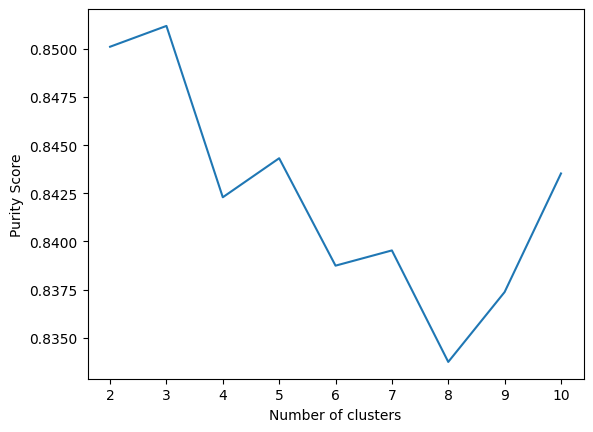

In [44]:
plt.plot(n_classes_range, purity_scores)
plt.xlabel('Number of clusters')
plt.ylabel('Purity Score')
plt.show()

In [45]:
plot_docs(tsne_embeddings, best_purity_specification[2])

<div dir="rtl">
<font face="XB Zar" size=4>
    <h3>
    <b>روش خوشه‌بندی سلسله‌مراتبی (Hierarchical Clustering)</b>
    </h3>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
تکنیک خوشه‌بندی سلسله مراتبی یکی از تکنیک‌های خوشه‌بندی در یادگیری ماشین است. در این قسمت شما می‌توانید از لایببری scipy یا هر لایبرری دیگری در پایتون استفاده کنید تا داده‌ها را به صورت سلسله‌مراتبی خوشه‌بندی کنید. سپس می‌توانید خوشه‌ها را با matplotlib مشاهده کنید.
</font>
</div>

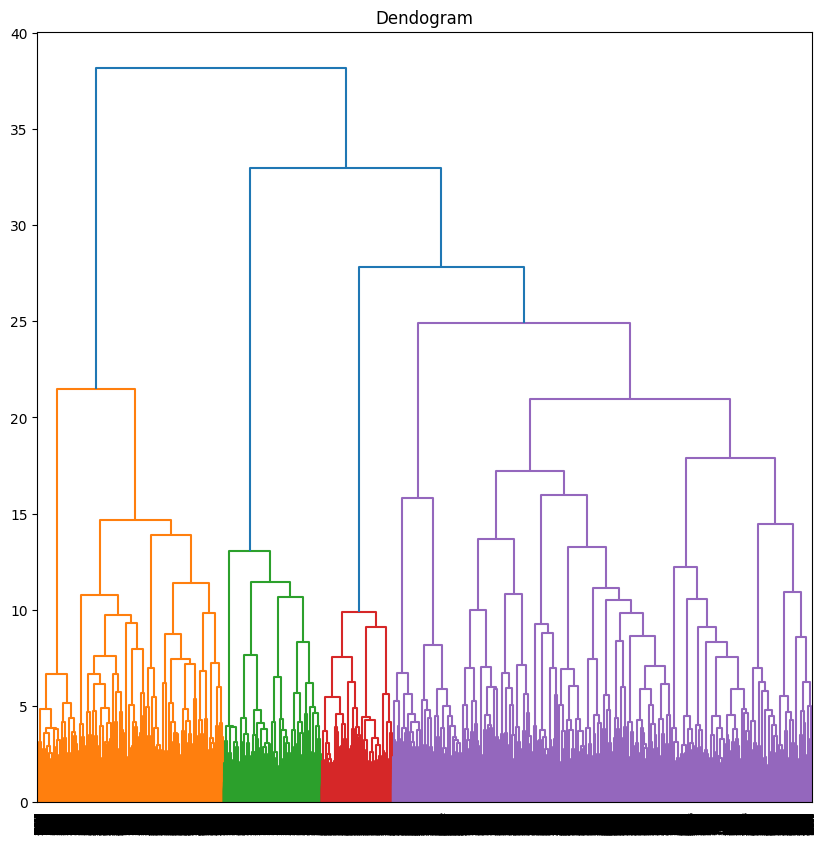

In [6]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
plt.title("Dendogram")
shc.dendrogram(shc.linkage(docs_embedding[:30000], method='ward'))
plt.show()

<div dir="rtl">
<font face="XB Zar" size=5>
    <h2>
    <b>خوشه‌بندی خروجی‌های سیستم جستجو فاز ۱</b>
    </h2>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
در این قسمت شما به افزودن قابلیت خوشه‌بندی در سیستم جستجویی که در فاز ۱ درس توسعه داده‌اید می‌پردازید. برای این منظور، توابعی که تابحال پیاده‌سازی کرده‌اید را به نحوی به سامانه جستجوی فاز ۱ خود اضافه می‌کنید که اسناد خروجی سامانه را خوشه‌بندی کرده و در نمایش خروجی،‌ اسنادی که در یک خوشه هستند را مشخص کند.
می‌توانید با فراخوانی توابعی که در فاز ۱ پیاده‌سازی کرده‌اید و ایجاد تغییر در آن‌ها در سلول زیر، این‌کار را انجام دهید. نحوه پیاده‌سازی این بخش به عهده خودتان است.
</font>
</div>

In [56]:
# colab requirements
is_colab = False

from google.colab import drive
import nltk
is_colab = True

!pip install import_ipynb
drive.mount('/content/drive')
nltk.download('wordnet')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [57]:
import import_ipynb
import ir_phase_1
import importlib

importlib.reload(ir_phase_1)

importing Jupyter notebook from ir_phase_1.ipynb
Start
Start preprocessing ...
Indexing ...


Completed documents: 100%|██████████| 6183/6183 [00:25<00:00, 240.40it/s]


Start viewing ...
Start dynamic indexing ...
Empty DataFrame
Columns: [paperId, title, abstract, Unnamed: 3, Unnamed: 4]
Index: []

Start compressing index ...
Start query correction ...


Strings with created bigram index: 100%|██████████| 35993/35993 [00:00<00:00, 41774.84it/s]


Start searching ...


Documents with calculated length in title field: 100%|██████████| 6183/6183 [00:05<00:00, 1125.61it/s]
Documents with calculated length in abstract field: 100%|██████████| 6183/6183 [00:06<00:00, 951.52it/s] 

Start evaluating...
End


<module 'ir_phase_1' from 'ir_phase_1.ipynb'>

In [58]:
from ir_phase_1 import get_document_by_id, search as ir_phase_1_search

In [59]:
def make_search_clean(search_documents):
    search_documents['preprocessed_summaries'] = ''
    search_documents['preprocessed_titles'] = ''

    pbar = tqdm(range(len(search_documents)), desc='preprocessed documents')
    for i in pbar:
        search_documents['preprocessed_titles'][i] = preprocess_text(search_documents['title'][i])
        search_documents['preprocessed_summaries'][i] = preprocess_text(search_documents['abstract'][i])

    search_documents = search_documents[['preprocessed_titles', 'preprocessed_summaries']].copy()
    search_documents.rename(
        columns={'preprocessed_titles': 'titles', 'preprocessed_summaries': 'summaries'},
        inplace=True)

    search_documents.insert(len(search_documents.columns) - 1, 'aggregated', '')

    for i in tqdm(range(len(search_documents)), desc='aggregated documents'):
        search_documents['titles'][i] = ' '.join(search_documents['titles'][i])
        search_documents['summaries'][i] = ' '.join(search_documents['summaries'][i])
        search_documents['aggregated'][i] = search_documents['titles'][i] + ' ' + search_documents['summaries'][i]

    return search_documents


def new_search(title_query: str, abstract_query: str, max_result_count: int, method: str='okapi25',
               weight: float=0.5, should_print=False):
    search_results = ir_phase_1_search(title_query=title_query, abstract_query=abstract_query, max_result_count=max_result_count,
                             method=method, weight=weight, should_print=should_print)
    search_documents = pd.DataFrame()

    for search_result in search_results:
        search_document = get_document_by_id(search_result, False)
        search_documents = pd.concat([search_documents, search_document])

    search_documents = search_documents[['paperId', 'title', 'abstract']].copy()
    search_documents.dropna(inplace=True)
    search_documents.reset_index(drop=True, inplace=True)
    clean_search_documents = make_search_clean(search_documents)
    search_documents_embedding = extract_embedding(clean_search_documents['aggregated'])
    search_cluster_specifications = run_kmeans(search_documents_embedding, range(2, 6), print_title=False)
    search_shilhouette_result = run_silhouette_score(search_documents_embedding, search_cluster_specifications)
    search_cluster_labels = search_shilhouette_result[2][2]

    new_search_result = {}
    for i in range(len(search_cluster_labels)):
        if search_cluster_labels[i] not in new_search_result:
            new_search_result[search_cluster_labels[i]] = []

        new_search_result[search_cluster_labels[i]].append(search_results[i])

    cluster_titles = get_cluster_titles(search_documents_embedding, search_shilhouette_result[2][1])
    new_search_result['cluster titles'] = cluster_titles
    return new_search_result

In [60]:
new_search(title_query='machine learning', abstract_query='deep', max_result_count=10, weight=0.3)

Checked documents: 100%|██████████| 1139/1139 [00:03<00:00, 360.26it/s]


preprocessed documents:   0%|          | 0/6 [00:00<?, ?it/s]

aggregated documents:   0%|          | 0/6 [00:00<?, ?it/s]

K-means: 2: 0it [00:00, ?it/s]

K-means: 3: 0it [00:00, ?it/s]

K-means: 4: 0it [00:00, ?it/s]

K-means: 5: 0it [00:00, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

{1: ['0276aecb97ffa1f7f279e2768abb3484933eacfb',
  '53b047e503f4c24602f376a774d653f7ed56c024',
  '1ba07035f83792154e77ed35d842e04de8a1eeeb'],
 0: ['864e033c002c5ec48d4c273c53ce995682fc3e21',
  'b3ea79473e7438ae3d551f79a84207f8bd0e830d',
  'bbf052271c70dd926cd230bb5640cdcdfeccf1cc'],
 'cluster titles': ['segmentation future-ai guiding principles consensus',
  'semantic semi-supervised segmentation survey stereo']}

<div dir="rtl">
<font face="XB Zar" size=5>
    <h2>
    <b>جست‌و‌جوی اسناد مشابه با یک سند</b>
    </h2>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
در این قسمت، شما به پیاده‌سازی تابع find_similar_docs می‌پردازید که در آن با دریافت اندیس یک سند در مجموعه دادگان، تعداد اسناد مشابه مورد نظر و لیست بردارهای جاسازی، اندیس اسناد مشابه با آن در مجموعه دادگان را در خروجی تولید می‌کند. برای این منظور، به تعداد num_of_similar_docs تا از نزدیک‌ترین بردارها را به بردار مدنظر پیدا کرده و اندیس آن‌ها را به عنوان خروجی برمیگردانید. اسناد مشابه باید به ترتیب شباهت (مقدار شباهت بردار جاسازی آن‌ها به بردار جاسازی سند ورودی) مرتب شده باشند. انتخاب معیار شباهت برعهده خودتان است.
</font>
</div>

In [66]:
## ؟ points

from typing import List
from numpy import dot
from numpy.linalg import norm

def get_cosine(first, second):
    return dot(first, second) / (norm(first) * norm(second))

def find_similar_docs(input_doc_index: int, num_of_similar_docs: int, emb_vecs: List):
    """Finds similar documents to input in dataset

    Parameters
    ----------
    input_doc_index: int
        Index of input document vector in emb_vecs list to search for specific paper

    num_of_similar_docs:
        Number of similar documents to return 

    emb_vecs : List
        A list of vectors corresponding to documents

    Returns
    -------
    List
        A list of similar document indexes to input document
    """

    input_doc_embedding = emb_vecs[input_doc_index]
    cosine_list = []
    for i in range(len(emb_vecs)):
        cosine = get_cosine(input_doc_embedding, emb_vecs[i])
        cosine_list.append((i, cosine))

    sorted_cosine_list = sorted(cosine_list, key=lambda x: x[1], reverse=True)
    similars_included_itself = [sorted_cosine_list[i][0] for i in range(num_of_similar_docs + 1)]
    similars_included_itself.remove(input_doc_index)
    return similars_included_itself


# find_similar_docs(int, int, [[NUM, NUM, NUM, ...], [NUM, NUM, NUM, ...], [NUM, NUM, NUM, ...]])

In [67]:
find_similar_docs(0, 10, docs_embedding)

[17704, 27091, 27597, 27268, 27394, 43061, 6030, 27321, 27630, 27633]

In [63]:
print('Have a Good Day :)')

Have a Good Day :)
